Итоговая работа должна отвечать следующим требованиям:

Программа реализована на языке программирования Python.

Выполнена загрузка и чтение данных из файлов.

Выполнена предварительная обработка данных (очистка и форматирование данных).

Выполнен разведочный анализ данных EDA.

Определены важные признаки. Выполнен поиск взаимосвязей между признаками.

Выполнено уменьшение размерности массива данных.

Составлена гипотеза о данных и выполнена проверка 
соответствующей гипотезы.

# Задача построения профилей клиентов платежной системы

Аналитическая задача — провести анализ данных с целью выделения наиболее типичных групп клиентов и разработки предложений для каждой из групп.

# Задача построения профилей клиентов платежной системы

Рассматривается задача сегментации клиентской базы системы денежных переводов. В распоряжении имеется датасет клиентов, каждый из которых описывается следующим набором признаков: 

Каждый клиент описывается следующим набором признаков:

|Признак|Комментарий|
|--:|:--|
|mdm_id|Идентификатор|
|BIRTHDAY|Дата рождения|
|CREDCODE|Кредитный код|
|1.1|Дисциплина клиентов без просрочки|
|1.2|Дисциплина клиентов с редкими просрочками|
|2.1|Количество переводов|
|2.1.1|Количество переводов до 1 смс|
|2.1.2|Количество переводов после 1 смс|
|2.1.3|Количество переводов до взятия кредита|
|2.1.4|Количество переводов после взятия кредита|
|2.2|Тип переводов|
|2.3|География переводов|
|2.4|География телефона|
|2.5|Сумма перевода|
|2.5.1|Максимальная сумма перевода|
|2.5.2|Средняя сумма перевода|
|2.5.3|Полная сумма перевода|
|2.5.4|Сумма перевода за полгода до взятия кредита|
|2.5.5|Сумма перевода за год до взятия кредита|
|4|Канал, через который пришел клиент|
|5.1|Количество смс до отклика|
|5.2|Дней с первой смс|
|5.6|Оператор связи|
|6.1|Возраст|
|6.2|Пол|
|6.5|Совпал ли регион получения кредита с регионом телефона|
|6.6|Указал иной номер телефона при выдаче кредита|

Шаг 1. Загрузка данных;

Шаг 2. Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

Шаг 3. Провести исследовательский анализ данных:
- исследовать распределения признаков;
- исследовать возможные зависимости между признаками;

Шаг 4. Провести сегментацию клиентов методами кластерного анализа.

Шаг 5. Провести классификацию клиентов.

Шаг 6. Проверить гипотезы по группам:
- сформулировать и проверить гипотезы о равенстве значений показателей по получившимся группам.

# Шаг 1. Загрузка данных

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans

from scipy import stats as st
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import anderson
from scipy.stats import jarque_bera

import math 

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
pd.options.display.precision = 2
pd.options.display.float_format ='{:.2f}'.format

from sklearn.preprocessing import LabelEncoder

In [249]:
df = pd.read_excel('project3.xlsx')
df.head(10)

,mdm_id,BIRTHDAY,CREDCODE,1.1,1.2,2.1,2.1.1,2.1.2,2.1.3,2.1.4,2.2,2.3,2.4,2.5,2.5.1,2.5.2,2.5.3,2.5.4,2.5.5,4,5.1,5.2,5.6,6.1,6.2,6.5,6.6
0,1493553,1981-05-08,9020,BAD,NaN,17.00,0.00,0.00,12.00,5.00,2.00,77.00,77.00,371600.00,265000.00,21858.82,371600.00,268000.00,271000.00,Стойка,NaN,NaN,NaN,33.00,Ж,1,1.00
1,8130758,1979-03-06,9020,BAD,NaN,4.00,0.00,0.00,2.00,2.00,2.00,77.00,77.00,137574.00,135000.00,34393.50,137574.00,135150.00,137574.00,Стойка,NaN,NaN,NaN,35.00,М,1,1.00
2,1782539,1957-04-29,9022,BAD,C,3.00,0.00,0.00,1.00,2.00,2.00,77.00,77.00,175150.00,135000.00,58383.33,175150.00,135150.00,135150.00,Стойка,NaN,NaN,МегаФон,57.00,М,1,1.00
3,12410720,1977-08-05,9022,BAD,A,3.00,0.00,0.00,1.00,2.00,2.00,77.00,77.00,50250.00,50000.00,16750.00,50250.00,50150.00,50150.00,Стойка,NaN,NaN,NaN,36.00,М,1,1.00
4,21309736,1978-08-15,9022,GOOD,C,5.00,0.00,0.00,2.00,3.00,69.00,77.00,77.00,215920.14,135000.00,43184.03,215920.14,135150.00,135150.00,Стойка,NaN,NaN,NaN,35.00,М,1,1.00
5,11343857,1983-05-06,9022,BAD,C,2.00,0.00,0.00,0.00,2.00,1.00,77.00,77.00,50150.00,50000.00,25075.00,50150.00,50150.00,50150.00,Стойка,NaN,NaN,NaN,31.00,Ж,1,1.00
6,5383517,1972-02-01,9022,BAD,A,4.00,0.00,0.00,2.00,2.00,2.00,77.00,77.00,204150.00,200000.00,51037.50,204150.00,200150.00,200150.00,Стойка,NaN,NaN,NaN,42.00,Ж,1,1.00
7,3882794,1979-05-20,9022,BAD,A,15.00,0.00,0.00,13.00,2.00,5.00,77.00,77.00,538300.00,400000.00,35886.67,538300.00,400150.00,400150.00,Стойка,NaN,NaN,NaN,35.00,Ж,1,1.00
8,7119607,1969-08-18,9020,BAD,NaN,4.00,0.00,0.00,2.00,2.00,2.00,77.00,77.00,135335.00,135000.00,33833.75,135335.00,135150.00,135150.00,Офис,NaN,NaN,NaN,44.00,Ж,1,1.00
9,7369177,1964-12-17,9022,BAD,A,9.00,0.00,0.00,6.00,3.00,2.00,77.00,77.00,62310.00,38000.00,6923.33,62310.00,48840.00,48940.00,Офис,NaN,NaN,Вымпел-Коммуникации,49.00,Ж,1,1.00


 Вывод: данные загружены корректно, почти в каждом признаке имеются пропуски, для некоторых признаков требуется преобразование типов, есть дублирующие записи. Столбцы 'Указал иной номер телефона при выдаче кредита', 'Совпал ли регион получения кредита с регионом телефона', 'Оператор связи', 'Дата рождения', 'География телефона', 'Полная сумма', 'кредитный код' можно удалить из дальнейшего рассмотрения.  Также необходимо изменить названия признаков для дальнейшей корректной работы.

# Шаг 2. Первичная обработка данных

▶ меняем названия признаков

In [250]:
#меняем названия столбцов
new_columns = {'1.1':'client_bez_pr','1.2':'client_s_pr', '2.1':'kolvo_per', '2.1.1':'kolvo_per_do1sms', '2.1.2':'kolvo_per_posle1sms', '2.1.3':'kolvo_per_dokred', '2.1.4':'kolvo_per_poslekred', '2.2':'tip_perev', '2.3':'geografy_perev', '2.4':'geografy_tel', '2.5':'sum_perev', '2.5.1':'max_sum', '2.5.2':'sred_sum', '2.5.3':'poln_sum', '2.5.4':'sum_perev_dokred', '2.5.5':'sum_perev_dokredgod', '4':'canal_privl', '5.1':'kolvo_sms_dootklika', '5.2':'dnei_s_sms', '5.6':'operator', '6.1':'vozrast','6.2':'pol', '6.5':'region_region', '6.6':'drug_nomer'}
df.rename(columns = new_columns, inplace = True)

In [251]:
df.columns = df.columns.str.lower() 

In [252]:
df

,mdm_id,birthday,credcode,client_bez_pr,client_s_pr,kolvo_per,kolvo_per_do1sms,kolvo_per_posle1sms,kolvo_per_dokred,kolvo_per_poslekred,tip_perev,geografy_perev,geografy_tel,sum_perev,max_sum,sred_sum,poln_sum,sum_perev_dokred,sum_perev_dokredgod,canal_privl,kolvo_sms_dootklika,dnei_s_sms,operator,vozrast,pol,region_region,drug_nomer
0,1493553,1981-05-08,9020,BAD,NaN,17.00,0.00,0.00,12.00,5.00,2.00,77.00,77.00,371600.00,265000.00,21858.82,371600.00,268000.00,271000.00,Стойка,NaN,NaN,NaN,33.00,Ж,1,1.00
1,8130758,1979-03-06,9020,BAD,NaN,4.00,0.00,0.00,2.00,2.00,2.00,77.00,77.00,137574.00,135000.00,34393.50,137574.00,135150.00,137574.00,Стойка,NaN,NaN,NaN,35.00,М,1,1.00
2,1782539,1957-04-29,9022,BAD,C,3.00,0.00,0.00,1.00,2.00,2.00,77.00,77.00,175150.00,135000.00,58383.33,175150.00,135150.00,135150.00,Стойка,NaN,NaN,МегаФон,57.00,М,1,1.00
3,12410720,1977-08-05,9022,BAD,A,3.00,0.00,0.00,1.00,2.00,2.00,77.00,77.00,50250.00,50000.00,16750.00,50250.00,50150.00,50150.00,Стойка,NaN,NaN,NaN,36.00,М,1,1.00
4,21309736,1978-08-15,9022,GOOD,C,5.00,0.00,0.00,2.00,3.00,69.00,77.00,77.00,215920.14,135000.00,43184.03,215920.14,135150.00,135150.00,Стойка,NaN,NaN,NaN,35.00,М,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50219,5593823,1962-12-08,9022,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Партнер,2.00,512.00,МегаФон,51.00,Ж,0,1.00
50220,11667343,1958-10-26,9022,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Партнер,8.00,162.00,Вымпел-Коммуникации,55.00,М,0,NaN
50221,5947389,1977-10-28,9022,BAD,A,NaN,NaN,NaN,NaN,NaN,2.00,77.00,77.00,NaN,NaN,NaN,NaN,NaN,NaN,Офис,NaN,-270.00,Мобильные ТелеСистемы,36.00,Ж,1,1.00
50222,8937816,1982-10-09,9022,BAD,B,NaN,NaN,NaN,NaN,NaN,44.00,77.00,77.00,NaN,NaN,NaN,NaN,NaN,NaN,Офис,NaN,NaN,NaN,31.00,М,1,1.00


In [253]:
df.dtypes

mdm_id                          int64
birthday               datetime64[ns]
credcode                        int64
client_bez_pr                  object
client_s_pr                    object
kolvo_per                     float64
kolvo_per_do1sms              float64
kolvo_per_posle1sms           float64
kolvo_per_dokred              float64
kolvo_per_poslekred           float64
tip_perev                     float64
geografy_perev                float64
geografy_tel                  float64
sum_perev                     float64
max_sum                       float64
sred_sum                      float64
poln_sum                      float64
sum_perev_dokred              float64
sum_perev_dokredgod           float64
canal_privl                    object
kolvo_sms_dootklika           float64
dnei_s_sms                    float64
operator                       object
vozrast                       float64
pol                            object
region_region                   int64
drug_nomer  

In [254]:
df.isna().sum()

mdm_id                     0
birthday                   0
credcode                   0
client_bez_pr              1
client_s_pr            10286
kolvo_per                 66
kolvo_per_do1sms          66
kolvo_per_posle1sms       66
kolvo_per_dokred          66
kolvo_per_poslekred       66
tip_perev                 33
geografy_perev            33
geografy_tel            1900
sum_perev                 66
max_sum                   66
sred_sum                  66
poln_sum                  66
sum_perev_dokred          66
sum_perev_dokredgod       66
canal_privl               31
kolvo_sms_dootklika     2614
dnei_s_sms              1728
operator                 645
vozrast                    9
pol                        9
region_region              0
drug_nomer               593
dtype: int64

▶ Произведем поиск и удаление дубликатов

In [255]:
print("""Количество дублирующихся записей 
в исходной датафрейме равно {}.
""".format(df.duplicated().sum())) 

Количество дублирующихся записей 
в исходной датафрейме равно 39.



In [256]:
df[df.duplicated() == True]   

,mdm_id,birthday,credcode,client_bez_pr,client_s_pr,kolvo_per,kolvo_per_do1sms,kolvo_per_posle1sms,kolvo_per_dokred,kolvo_per_poslekred,tip_perev,geografy_perev,geografy_tel,sum_perev,max_sum,sred_sum,poln_sum,sum_perev_dokred,sum_perev_dokredgod,canal_privl,kolvo_sms_dootklika,dnei_s_sms,operator,vozrast,pol,region_region,drug_nomer
285,13429088,1984-09-12,9021,MIDDLE,C,89.00,0.00,0.00,6.00,83.00,2.00,77.00,33.00,573174.03,25950.00,6440.16,573174.03,100450.00,100450.00,Партнер,NaN,NaN,Вотек Мобайл,29.00,М,1,1.00
1052,13875298,1983-03-12,9021,MIDDLE,B,32.00,0.00,0.00,5.00,27.00,2.00,77.00,2.00,221124.10,10029.42,6910.13,221124.10,180971.01,180971.01,Партнер,NaN,NaN,Мобильные ТелеСистемы,31.00,Ж,0,1.00
1180,13875298,1983-03-12,9021,MIDDLE,B,32.00,0.00,0.00,5.00,27.00,2.00,77.00,2.00,221124.10,10029.42,6910.13,221124.10,180971.01,180971.01,Партнер,NaN,NaN,Мобильные ТелеСистемы,31.00,Ж,0,1.00
1209,14970042,1982-12-07,9021,MIDDLE,NaN,202.00,0.00,0.00,52.00,150.00,0.00,77.00,NaN,943902.86,45000.00,4672.79,943902.86,322458.92,322458.92,Партнер,NaN,NaN,Вымпел-Коммуникации,31.00,М,0,1.00
1222,14970042,1982-12-07,9021,MIDDLE,NaN,202.00,0.00,0.00,89.00,113.00,0.00,77.00,NaN,943902.86,45000.00,4672.79,943902.86,454066.77,454066.77,Партнер,NaN,NaN,Вымпел-Коммуникации,31.00,М,0,1.00
1410,14970042,1982-12-07,9021,MIDDLE,NaN,202.00,0.00,0.00,19.00,183.00,0.00,77.00,NaN,943902.86,45000.00,4672.79,943902.86,151093.25,151093.25,Партнер,NaN,NaN,Вымпел-Коммуникации,31.00,М,0,1.00
1565,13429088,1984-09-12,9021,MIDDLE,C,89.00,0.00,0.00,55.00,34.00,2.00,77.00,33.00,573174.03,25950.00,6440.16,573174.03,404260.00,404260.00,Партнер,NaN,NaN,Вотек Мобайл,29.00,М,1,1.00
1634,13429088,1984-09-12,9021,MIDDLE,C,89.00,0.00,0.00,39.00,50.00,2.00,77.00,33.00,573174.03,25950.00,6440.16,573174.03,293060.00,293060.00,Партнер,NaN,NaN,Вотек Мобайл,29.00,М,1,1.00
13224,14293051,1979-12-08,9022,GOOD,B,5.00,3.00,2.00,3.00,2.00,5.00,61.00,61.00,33695.60,30000.00,6739.12,33695.60,30150.00,30150.00,Офис,8.00,461.00,Ростовская Сотовая Связь,34.00,М,1,1.00
31949,3474359,1978-01-28,9027,MIDDLE,B,10.00,2.00,8.00,4.00,6.00,2.00,62.00,62.00,192150.00,165000.00,19215.00,192150.00,165250.00,167250.00,Офис,44.00,441.00,Вымпел-Коммуникации,36.00,Ж,1,1.00


In [257]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

In [258]:
df

,mdm_id,birthday,credcode,client_bez_pr,client_s_pr,kolvo_per,kolvo_per_do1sms,kolvo_per_posle1sms,kolvo_per_dokred,kolvo_per_poslekred,tip_perev,geografy_perev,geografy_tel,sum_perev,max_sum,sred_sum,poln_sum,sum_perev_dokred,sum_perev_dokredgod,canal_privl,kolvo_sms_dootklika,dnei_s_sms,operator,vozrast,pol,region_region,drug_nomer
0,1493553,1981-05-08,9020,BAD,NaN,17.00,0.00,0.00,12.00,5.00,2.00,77.00,77.00,371600.00,265000.00,21858.82,371600.00,268000.00,271000.00,Стойка,NaN,NaN,NaN,33.00,Ж,1,1.00
1,8130758,1979-03-06,9020,BAD,NaN,4.00,0.00,0.00,2.00,2.00,2.00,77.00,77.00,137574.00,135000.00,34393.50,137574.00,135150.00,137574.00,Стойка,NaN,NaN,NaN,35.00,М,1,1.00
2,1782539,1957-04-29,9022,BAD,C,3.00,0.00,0.00,1.00,2.00,2.00,77.00,77.00,175150.00,135000.00,58383.33,175150.00,135150.00,135150.00,Стойка,NaN,NaN,МегаФон,57.00,М,1,1.00
3,12410720,1977-08-05,9022,BAD,A,3.00,0.00,0.00,1.00,2.00,2.00,77.00,77.00,50250.00,50000.00,16750.00,50250.00,50150.00,50150.00,Стойка,NaN,NaN,NaN,36.00,М,1,1.00
4,21309736,1978-08-15,9022,GOOD,C,5.00,0.00,0.00,2.00,3.00,69.00,77.00,77.00,215920.14,135000.00,43184.03,215920.14,135150.00,135150.00,Стойка,NaN,NaN,NaN,35.00,М,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50180,5593823,1962-12-08,9022,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Партнер,2.00,512.00,МегаФон,51.00,Ж,0,1.00
50181,11667343,1958-10-26,9022,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Партнер,8.00,162.00,Вымпел-Коммуникации,55.00,М,0,NaN
50182,5947389,1977-10-28,9022,BAD,A,NaN,NaN,NaN,NaN,NaN,2.00,77.00,77.00,NaN,NaN,NaN,NaN,NaN,NaN,Офис,NaN,-270.00,Мобильные ТелеСистемы,36.00,Ж,1,1.00
50183,8937816,1982-10-09,9022,BAD,B,NaN,NaN,NaN,NaN,NaN,44.00,77.00,77.00,NaN,NaN,NaN,NaN,NaN,NaN,Офис,NaN,NaN,NaN,31.00,М,1,1.00


▶ удаление признаков

In [259]:
df1 = df.drop(['credcode', 'operator', 'region_region', 'drug_nomer','birthday', 'geografy_tel','poln_sum'], axis=1)

In [260]:
df1

,mdm_id,client_bez_pr,client_s_pr,kolvo_per,kolvo_per_do1sms,kolvo_per_posle1sms,kolvo_per_dokred,kolvo_per_poslekred,tip_perev,geografy_perev,sum_perev,max_sum,sred_sum,sum_perev_dokred,sum_perev_dokredgod,canal_privl,kolvo_sms_dootklika,dnei_s_sms,vozrast,pol
0,1493553,BAD,NaN,17.00,0.00,0.00,12.00,5.00,2.00,77.00,371600.00,265000.00,21858.82,268000.00,271000.00,Стойка,NaN,NaN,33.00,Ж
1,8130758,BAD,NaN,4.00,0.00,0.00,2.00,2.00,2.00,77.00,137574.00,135000.00,34393.50,135150.00,137574.00,Стойка,NaN,NaN,35.00,М
2,1782539,BAD,C,3.00,0.00,0.00,1.00,2.00,2.00,77.00,175150.00,135000.00,58383.33,135150.00,135150.00,Стойка,NaN,NaN,57.00,М
3,12410720,BAD,A,3.00,0.00,0.00,1.00,2.00,2.00,77.00,50250.00,50000.00,16750.00,50150.00,50150.00,Стойка,NaN,NaN,36.00,М
4,21309736,GOOD,C,5.00,0.00,0.00,2.00,3.00,69.00,77.00,215920.14,135000.00,43184.03,135150.00,135150.00,Стойка,NaN,NaN,35.00,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50180,5593823,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN,2.00,0.00,NaN,NaN,NaN,NaN,NaN,Партнер,2.00,512.00,51.00,Ж
50181,11667343,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Партнер,8.00,162.00,55.00,М
50182,5947389,BAD,A,NaN,NaN,NaN,NaN,NaN,2.00,77.00,NaN,NaN,NaN,NaN,NaN,Офис,NaN,-270.00,36.00,Ж
50183,8937816,BAD,B,NaN,NaN,NaN,NaN,NaN,44.00,77.00,NaN,NaN,NaN,NaN,NaN,Офис,NaN,NaN,31.00,М


In [261]:
df1.describe()

,mdm_id,kolvo_per,kolvo_per_do1sms,kolvo_per_posle1sms,kolvo_per_dokred,kolvo_per_poslekred,tip_perev,geografy_perev,sum_perev,max_sum,sred_sum,sum_perev_dokred,sum_perev_dokredgod,kolvo_sms_dootklika,dnei_s_sms,vozrast
count,50185.00,50119.00,50119.00,50119.00,50119.00,50119.00,50152.00,50152.00,50119.00,50119.00,50119.00,50119.00,50119.00,47580.00,48465.00,50176.00
mean,10976876.52,17.16,6.65,10.15,9.60,7.56,13.19,110.24,299144.28,167740.79,34501.63,184153.59,197807.75,10.65,257.55,43.26
std,5760701.71,34.36,20.92,22.87,26.91,13.88,22.30,4971.71,452342.75,141013.09,43557.88,181428.06,229029.58,15.94,233.90,10.89
min,1400402.00,1.00,0.00,0.00,0.00,0.00,-1.00,0.00,30.00,30.00,30.00,0.00,0.00,1.00,-417.00,22.00
25%,6394279.00,4.00,1.00,2.00,1.00,2.00,2.00,48.00,92200.00,55000.00,10117.63,59026.00,60600.00,2.00,45.00,34.00
50%,11334056.00,9.00,2.00,5.00,2.00,4.00,5.00,73.00,187596.43,120000.00,19858.33,130150.00,135150.00,6.00,208.00,43.00
75%,14441428.00,18.00,5.00,11.00,9.00,9.00,6.00,77.00,382575.72,235000.00,41667.89,250150.00,265418.56,15.00,439.00,52.00
max,30065274.00,2220.00,2111.00,796.00,2138.00,639.00,69.00,498002.00,19536910.00,2150000.00,644225.00,9832553.00,17640609.48,511.00,852.00,74.00


 # Работа с аномалиями

In [262]:
dict_to_rus = {'mdm_id': 'идентификационный номер клиента',
               'client_bez_pr':'Дисциплина клиентов без просрочки',
               'client_s_pr':'Дисциплина клиентов с редкими просрочками',
               'kolvo_per':'Количество переводов',
               'kolvo_per_do1sms':'Количество переводов до 1 смс', 
               'kolvo_per_posle1sms':'Количество переводов после 1 смс', 
               'kolvo_per_dokred':'Количество переводов до взятия кредита', 
               'kolvo_per_poslekred':'Количество переводов после взятия кредита', 
               'tip_perev':'Тип переводов', 
               'geografy_perev':'География переводов',
               'sum_perev':'Сумма перевода', 
               'max_sum':'Максимальная сумма перевода', 
               'sred_sum':'Средняя сумма перевода', 
               'sum_perev_dokred':'Сумма перевода за полгода до взятия кредита', 
               'sum_perev_dokredgod':'Сумма перевода за год до взятия кредита',
               'canal_privl': 'Канал, через который пришел клиент партнер',
               'kolvo_sms_dootklika':'Количество смс до отклика',
               'dnei_s_sms':'Дней с первой смс', 
               'vozrast':'Возраст',
               'pol':'Пол', 
               'client_bez_pr':'Дисциплина клиентов без просрочки',
               'client_s_pr':'Дисциплина клиентов с редкими просрочками'
}
               

In [263]:
#def calc_wisk(col):
    #Q1, median, Q3 = np.percentile(np.asarray(df1[col]), [25, 50, 75])
    #loval = Q1 - 1.5 * IQR
    #hival = Q3 + 1.5 * IQR
    #wiskhi = np.compress(np.asarray(df1[col]) <= hival, np.asarray(df1[col]))
    #wisklo = np.compress(np.asarray(df1[col]) >= loval, np.asarray(df1[col]))
    #actual_hival = np.max(wiskhi)
    #actual_loval = np.min(wisklo)
    #return actual_loval, actual_hival

▶ признак kolvo_per

In [264]:
new_percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
np.round(df1['kolvo_per'].describe(percentiles = new_percentiles))

count   50119.00
mean       17.00
std        34.00
min         1.00
1%          1.00
5%          2.00
25%         4.00
50%         9.00
75%        18.00
90%        36.00
95%        57.00
99%       141.00
max      2220.00
Name: kolvo_per, dtype: float64

In [265]:
df1.drop(df1[(df1.kolvo_per > 450) & (df1.kolvo_sms_dootklika < 1)].index, inplace = True)

▶ признак kolvo_per_do1sms

In [266]:
df1.kolvo_per_do1sms.value_counts()

1.00       12894
0.00       11237
2.00        6010
3.00        3425
4.00        2405
           ...  
154.00         1
475.00         1
382.00         1
1041.00        1
402.00         1
Name: kolvo_per_do1sms, Length: 212, dtype: int64

In [267]:
new_percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
np.round(df1['kolvo_per_do1sms'].describe(percentiles = new_percentiles))

count   50119.00
mean        7.00
std        21.00
min         0.00
1%          0.00
5%          0.00
25%         1.00
50%         2.00
75%         5.00
90%        17.00
95%        31.00
99%        70.00
max      2111.00
Name: kolvo_per_do1sms, dtype: float64

In [268]:
df1.drop(df1[(df1.kolvo_per_do1sms > 70) & (df1.kolvo_per_do1sms < 1)].index, inplace = True)

▶ признак kolvo_per_posle1sms

In [269]:
df1.kolvo_per_posle1sms.value_counts()

2.00      9122
3.00      4246
1.00      3959
4.00      3305
5.00      2681
          ... 
202.00       1
203.00       1
204.00       1
205.00       1
796.00       1
Name: kolvo_per_posle1sms, Length: 201, dtype: int64

In [270]:
new_percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
np.round(df1['kolvo_per_posle1sms'].describe(percentiles = new_percentiles))

count   50119.00
mean       10.00
std        23.00
min         0.00
1%          0.00
5%          1.00
25%         2.00
50%         5.00
75%        11.00
90%        20.00
95%        30.00
99%        85.00
max       796.00
Name: kolvo_per_posle1sms, dtype: float64

In [271]:
df1.drop(df1[df1.kolvo_per_posle1sms > 85].index, inplace = True)

▶ признак kolvo_per_dokred

In [272]:
new_percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
np.round(df1['kolvo_per_dokred'].describe(percentiles = new_percentiles))

count   49619.00
mean        8.00
std        19.00
min         0.00
1%          0.00
5%          0.00
25%         1.00
50%         2.00
75%         8.00
90%        23.00
95%        38.00
99%        79.00
max      1041.00
Name: kolvo_per_dokred, dtype: float64

In [273]:
df1.drop(df1[df1.kolvo_per_dokred > 102].index, inplace = True)

▶ признак kolvo_per_poslekred

In [274]:
df1.kolvo_per_poslekred.value_counts()

2.00      11821
1.00       5065
3.00       4718
4.00       3522
5.00       2914
          ...  
169.00        1
162.00        1
151.00        1
105.00        1
81.00         1
Name: kolvo_per_poslekred, Length: 112, dtype: int64

In [275]:
new_percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
np.round(df1['kolvo_per_poslekred'].describe(percentiles = new_percentiles))

count   49364.00
mean        7.00
std         8.00
min         0.00
1%          1.00
5%          1.00
25%         2.00
50%         4.00
75%         9.00
90%        14.00
95%        19.00
99%        34.00
max       190.00
Name: kolvo_per_poslekred, dtype: float64

In [276]:
df1.drop(df1[df1.kolvo_per_poslekred > 52].index, inplace = True)

▶ признак tip_perev

In [277]:
df1.tip_perev.value_counts()

2.00     18492
5.00     13752
69.00     6564
6.00      2532
8.00      1995
1.00      1634
10.00     1523
0.00       694
12.00      471
26.00      275
32.00      234
37.00      203
11.00      192
16.00      186
45.00      157
7.00       138
44.00       62
58.00       42
3.00        30
21.00       14
28.00       14
33.00        7
4.00         5
29.00        5
19.00        5
23.00        4
17.00        3
55.00        3
34.00        2
53.00        2
59.00        2
61.00        2
54.00        2
43.00        1
67.00        1
30.00        1
-1.00        1
9.00         1
49.00        1
Name: tip_perev, dtype: int64

In [278]:
new_percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
np.round(df1['tip_perev'].describe(percentiles = new_percentiles))

count   49252.00
mean       13.00
std        22.00
min        -1.00
1%          0.00
5%          2.00
25%         2.00
50%         5.00
75%         6.00
90%        69.00
95%        69.00
99%        69.00
max        69.00
Name: tip_perev, dtype: float64

In [279]:
df1.drop(df1[(df1.tip_perev > 69) &(df1.tip_perev < 1)].index, inplace = True)

▶ признак geografy_perev

In [280]:
df1.geografy_perev.value_counts()

77.00        18932
78.00         4103
61.00         2338
23.00         2108
66.00         1496
             ...  
75.00            2
498001.00        2
6.00             1
20.00            1
19.00            1
Name: geografy_perev, Length: 74, dtype: int64

In [281]:
new_percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
np.round(df1['geografy_perev'].describe(percentiles = new_percentiles))

count    49252.00
mean       111.00
std       5017.00
min          0.00
1%           2.00
5%          13.00
25%         47.00
50%         73.00
75%         77.00
90%         77.00
95%         78.00
99%         78.00
max     498002.00
Name: geografy_perev, dtype: float64

In [282]:
df1.drop(df1[(df1.geografy_perev > 78) &(df1.geografy_perev < 1)].index, inplace = True)

удаляем аномалию вручную

In [283]:
df1[df1.geografy_perev == 498001]

,mdm_id,client_bez_pr,client_s_pr,kolvo_per,kolvo_per_do1sms,kolvo_per_posle1sms,kolvo_per_dokred,kolvo_per_poslekred,tip_perev,geografy_perev,sum_perev,max_sum,sred_sum,sum_perev_dokred,sum_perev_dokredgod,canal_privl,kolvo_sms_dootklika,dnei_s_sms,vozrast,pol
28299,7390416,MIDDLE,A,7.00,0.00,7.00,0.00,7.00,2.00,498001.00,190600.00,155000.00,27228.57,155100.00,155100.00,Партнер,1.00,345.00,44.00,Ж
33687,3651661,MIDDLE,NaN,10.00,1.00,9.00,3.00,7.00,2.00,498001.00,121745.51,80275.51,12174.55,40660.00,40660.00,Партнер,4.00,97.00,55.00,М


In [284]:
df1.drop(df1[df1.geografy_perev == 498001].index, inplace = True)

▶ признак sum_perev

In [285]:
df1.sum_perev.value_counts(30)

50150.00     0.01
30100.00     0.00
50000.00     0.00
30150.00     0.00
100150.00    0.00
             ... 
581791.00    0.00
123585.00    0.00
202640.00    0.00
147800.00    0.00
3637178.83   0.00
Name: sum_perev, Length: 33393, dtype: float64

In [286]:
new_percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
np.round(df1['sum_perev'].describe(percentiles = new_percentiles))

count      49217.00
mean      280384.00
std       347620.00
min           30.00
1%         23451.00
5%         39770.00
25%        90550.00
50%       184090.00
75%       369100.00
90%       594684.00
95%       768051.00
99%      1447852.00
max     17746614.00
Name: sum_perev, dtype: float64

In [287]:
df1.drop(df1[(df1.sum_perev > 1702879)&(df1.sum_perev < 30)].index, inplace = True)

▶ признак max_sum

In [288]:
df1.max_sum.value_counts()


50000.00     4930
100000.00    3109
30000.00     3012
55000.00     2431
500000.00    1975
             ... 
78399.00        1
42068.01        1
207310.23       1
35274.14        1
203200.00       1
Name: max_sum, Length: 3411, dtype: int64

In [289]:
new_percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
np.round(df1['max_sum'].describe(percentiles = new_percentiles))

count     49217.00
mean     167471.00
std      140700.00
min          30.00
1%        14174.00
5%        30000.00
25%       55000.00
50%      120000.00
75%      230000.00
90%      410000.00
95%      490000.00
99%      500000.00
max     2150000.00
Name: max_sum, dtype: float64

In [290]:
#df1.drop(df1[(df1.max_sum > 437239.0)&(df1.max_sum < 30)].index, inplace = True)

▶ признак sred_sum

In [291]:
df1.sred_sum.value_counts()


25075.00    286
15050.00    217
15075.00    205
50000.00    205
30000.00    202
           ... 
29359.63      1
28528.15      1
8489.44       1
7119.26       1
35312.42      1
Name: sred_sum, Length: 39118, dtype: int64

In [292]:
new_percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
np.round(df1['sred_sum'].describe(percentiles = new_percentiles))

count    49217.00
mean     34994.00
std      43782.00
min         30.00
1%        2551.00
5%        4655.00
25%      10437.00
50%      20222.00
75%      42340.00
90%      78115.00
95%     114433.00
99%     225075.00
max     644225.00
Name: sred_sum, dtype: float64

In [293]:
#df1.drop(df1[(df1.sred_sum > 250000) & (df1.sred_sum < 30) ].index, inplace = True)

▶ признак sum_perev_dokred

In [294]:
df1.sum_perev_dokred.value_counts()


50100.00     1333
50000.00     1097
50150.00      994
100150.00     877
30100.00      754
             ... 
51783.38        1
59120.00        1
400700.00       1
75447.70        1
973252.58       1
Name: sum_perev_dokred, Length: 11273, dtype: int64

In [295]:
new_percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
np.round(df1['sum_perev_dokred'].describe(percentiles = new_percentiles))

count     49217.00
mean     180642.00
std      168370.00
min           0.00
1%         2866.00
5%        30100.00
25%       58000.00
50%      128650.00
75%      250000.00
90%      450000.00
95%      500100.00
99%      639208.00
max     9832553.00
Name: sum_perev_dokred, dtype: float64

In [296]:
#df1.drop(df1[df1.sum_perev_dokred > 449600].index, inplace = True)

▶ sum_perev_dokredgod

In [297]:
df1.sum_perev_dokredgod.value_counts()

50100.00      1150
50000.00       917
50150.00       828
100150.00      764
30100.00       674
              ... 
647600.00        1
231360.00        1
114750.00        1
515016.00        1
1476793.58       1
Name: sum_perev_dokredgod, Length: 13931, dtype: int64

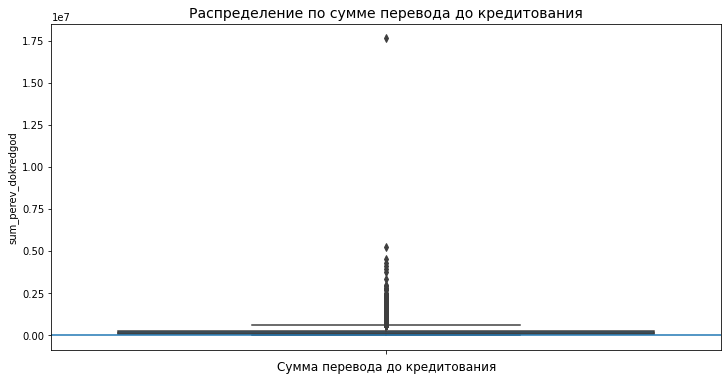

In [298]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df1['sum_perev_dokredgod'])
plt.title('Распределение по сумме перевода до кредитования', fontsize=14)
plt.xlabel('Сумма перевода до кредитования', fontsize=12)
plt.axhline(y=10)
plt.show()

In [299]:
new_percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
np.round(df1['sum_perev_dokredgod'].describe(percentiles = new_percentiles))

count      49217.00
mean      192250.00
std       202495.00
min            0.00
1%         10000.00
5%         30150.00
25%        60150.00
50%       135100.00
75%       264800.00
90%       450100.00
95%       504462.00
99%       756084.00
max     17640609.00
Name: sum_perev_dokredgod, dtype: float64

In [300]:
#df1.drop(df1[(df1.sum_perev_dokredgod > 367750)].index, inplace = True)

▶ kolvo_sms_dootklika

In [301]:
df1.kolvo_sms_dootklika.value_counts()

1.00      7127
2.00      4887
3.00      3908
4.00      3138
5.00      2600
          ... 
78.00        1
310.00       1
486.00       1
98.00        1
202.00       1
Name: kolvo_sms_dootklika, Length: 156, dtype: int64

In [302]:
new_percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
np.round(df1['kolvo_sms_dootklika'].describe(percentiles = new_percentiles))

count   46758.00
mean       11.00
std        16.00
min         1.00
1%          1.00
5%          1.00
25%         2.00
50%         6.00
75%        15.00
90%        24.00
95%        30.00
99%        51.00
max       511.00
Name: kolvo_sms_dootklika, dtype: float64

In [303]:
df1.drop(df1[df1.kolvo_sms_dootklika > 69].index, inplace = True)

▶ dnei_s_sms

In [304]:
df1.dnei_s_sms.value_counts()

2.00       860
3.00       819
1.00       781
4.00       727
5.00       608
          ... 
-21.00       1
-103.00      1
-93.00       1
-81.00       1
-270.00      1
Name: dnei_s_sms, Length: 1049, dtype: int64

In [305]:
new_percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
np.round(df1['dnei_s_sms'].describe(percentiles = new_percentiles))

count   47428.00
mean      254.00
std       232.00
min      -417.00
1%        -58.00
5%          2.00
25%        44.00
50%       203.00
75%       432.00
90%       616.00
95%       687.00
99%       742.00
max       852.00
Name: dnei_s_sms, dtype: float64

In [306]:
df1.drop(df1[(df1.dnei_s_sms > 750) & (df1.dnei_s_sms < 1) ].index, inplace = True)

In [307]:
df1.dnei_s_sms.value_counts()

2.00       860
3.00       819
1.00       781
4.00       727
5.00       608
          ... 
-21.00       1
-103.00      1
-93.00       1
-81.00       1
-270.00      1
Name: dnei_s_sms, Length: 1049, dtype: int64

▶ vozrast

In [308]:
df1.vozrast.value_counts()

41.00    1619
38.00    1611
40.00    1530
43.00    1524
39.00    1492
42.00    1482
44.00    1471
37.00    1462
36.00    1422
34.00    1415
35.00    1407
45.00    1384
33.00    1381
31.00    1357
51.00    1348
47.00    1343
50.00    1336
30.00    1325
48.00    1323
52.00    1300
32.00    1296
49.00    1272
46.00    1264
53.00    1183
29.00    1168
54.00    1135
55.00    1110
27.00    1110
28.00    1103
56.00    1053
26.00     984
57.00     934
58.00     882
59.00     811
60.00     752
61.00     648
25.00     640
62.00     534
63.00     489
64.00     424
65.00     397
24.00     370
67.00     288
66.00     285
68.00     170
23.00     151
69.00      59
70.00      20
73.00      13
72.00      11
22.00       9
71.00       6
74.00       4
Name: vozrast, dtype: int64

In [309]:
new_percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
np.round(df1['vozrast'].describe(percentiles = new_percentiles))

count   49107.00
mean       43.00
std        11.00
min        22.00
1%         24.00
5%         27.00
25%        34.00
50%        43.00
75%        52.00
90%        58.00
95%        62.00
99%        67.00
max        74.00
Name: vozrast, dtype: float64

In [310]:
df1.drop(df1[(df1.vozrast > 22) & (df1.dnei_s_sms <74) ].index, inplace = True)

In [311]:
df1

,mdm_id,client_bez_pr,client_s_pr,kolvo_per,kolvo_per_do1sms,kolvo_per_posle1sms,kolvo_per_dokred,kolvo_per_poslekred,tip_perev,geografy_perev,sum_perev,max_sum,sred_sum,sum_perev_dokred,sum_perev_dokredgod,canal_privl,kolvo_sms_dootklika,dnei_s_sms,vozrast,pol
0,1493553,BAD,NaN,17.00,0.00,0.00,12.00,5.00,2.00,77.00,371600.00,265000.00,21858.82,268000.00,271000.00,Стойка,NaN,NaN,33.00,Ж
1,8130758,BAD,NaN,4.00,0.00,0.00,2.00,2.00,2.00,77.00,137574.00,135000.00,34393.50,135150.00,137574.00,Стойка,NaN,NaN,35.00,М
2,1782539,BAD,C,3.00,0.00,0.00,1.00,2.00,2.00,77.00,175150.00,135000.00,58383.33,135150.00,135150.00,Стойка,NaN,NaN,57.00,М
3,12410720,BAD,A,3.00,0.00,0.00,1.00,2.00,2.00,77.00,50250.00,50000.00,16750.00,50150.00,50150.00,Стойка,NaN,NaN,36.00,М
4,21309736,GOOD,C,5.00,0.00,0.00,2.00,3.00,69.00,77.00,215920.14,135000.00,43184.03,135150.00,135150.00,Стойка,NaN,NaN,35.00,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50178,6315081,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN,2.00,77.00,NaN,NaN,NaN,NaN,NaN,Офис,9.00,191.00,30.00,Ж
50179,8218194,MIDDLE,A,NaN,NaN,NaN,NaN,NaN,2.00,77.00,NaN,NaN,NaN,NaN,NaN,Офис,12.00,192.00,51.00,М
50180,5593823,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN,2.00,0.00,NaN,NaN,NaN,NaN,NaN,Партнер,2.00,512.00,51.00,Ж
50181,11667343,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Партнер,8.00,162.00,55.00,М


▶ преобразование типов

In [312]:
col_cat = ['canal_privl', 'pol', 'client_bez_pr','client_s_pr']
for col in col_cat:
    print('--------{}----'.format(col))
    print(df[col].unique())
    print('--------{}----'.format(col))

--------canal_privl----
['Стойка' 'Офис' 'Партнер' nan]
--------canal_privl----
--------pol----
['Ж' 'М' nan]
--------pol----
--------client_bez_pr----
['BAD' 'GOOD' 'MIDDLE' nan]
--------client_bez_pr----
--------client_s_pr----
[nan 'C' 'A' 'B']
--------client_s_pr----


In [313]:
df1 = df1.astype({'kolvo_per':'int64',
                'kolvo_per_do1sms' : 'int64',
                'kolvo_per_posle1sms':'int64',
                'kolvo_per_dokred':'int64',
                'kolvo_per_poslekred':'int64',
                'tip_perev':'int64',
                'geografy_perev':'int64',
                'kolvo_sms_dootklika':'int64',
                'dnei_s_sms':'int64',
                'vozrast':'int64'}, errors='ignore')

In [314]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34171 entries, 0 to 50183
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mdm_id               34171 non-null  int64  
 1   client_bez_pr        34171 non-null  object 
 2   client_s_pr          26114 non-null  object 
 3   kolvo_per            34132 non-null  float64
 4   kolvo_per_do1sms     34132 non-null  float64
 5   kolvo_per_posle1sms  34132 non-null  float64
 6   kolvo_per_dokred     34132 non-null  float64
 7   kolvo_per_poslekred  34132 non-null  float64
 8   tip_perev            34148 non-null  float64
 9   geografy_perev       34148 non-null  float64
 10  sum_perev            34132 non-null  float64
 11  max_sum              34132 non-null  float64
 12  sred_sum             34132 non-null  float64
 13  sum_perev_dokred     34132 non-null  float64
 14  sum_perev_dokredgod  34132 non-null  float64
 15  canal_privl          34148 non-null 

In [315]:
df1['geografy_perev'].value_counts().tail(20)

24.00        7
7.00         7
1.00         6
8.00         5
15.00        5
9.00         4
45.00        4
25.00        4
32.00        3
75.00        2
65.00        2
67.00        2
57.00        2
11.00        2
14.00        2
22.00        1
498002.00    1
6.00         1
19.00        1
38.00        1
Name: geografy_perev, dtype: int64

▶ преобразуем некоторые типы с помощью методов кодирования

In [316]:
l_e =  LabelEncoder()
l_e.fit(df1['pol'])
df1['pol_new'] = l_e.transform(df1['pol'])
l_e.inverse_transform([0,1])

array(['Ж', 'М'], dtype=object)

In [317]:
l_e.fit(df1['client_bez_pr'])
df1['client_bez_pr_new'] = l_e.transform(df1['client_bez_pr'])
l_e.inverse_transform([0,1,2])

array(['BAD', 'GOOD', 'MIDDLE'], dtype=object)

In [318]:
df1 = pd.get_dummies(df1, columns=['client_s_pr','canal_privl'])

In [319]:
df1 = df1.astype({'client_s_pr_A':'int64',
                  'client_s_pr_B':'int64',
                  'client_s_pr_C':'int64',
                  'canal_privl_Офис':'int64',
                  'canal_privl_Партнер':'int64',
                  'canal_privl_Стойка':'int64',
                  'geografy_perev':'int64'	
                
}, errors='ignore')

▶ переименуем вновь созданные признаки и приведем к нижнему регистру

In [320]:
new_columns = {'canal_privl_Офис':'canal_privl_ofis','canal_privl_Партнер':'canal_privl_partner','canal_privl_Стойка':'canal_privl_stoika'}
df1.rename(columns = new_columns, inplace = True)

In [321]:
df1.columns = df1.columns.str.lower()

In [322]:
df1 = df1.drop(['client_bez_pr', 'pol'], axis=1)

▶ Работа с пропущенными значениями

In [323]:
#проверяем пропуски
for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

mdm_id - 0%
kolvo_per - 0%
kolvo_per_do1sms - 0%
kolvo_per_posle1sms - 0%
kolvo_per_dokred - 0%
kolvo_per_poslekred - 0%
tip_perev - 0%
geografy_perev - 0%
sum_perev - 0%
max_sum - 0%
sred_sum - 0%
sum_perev_dokred - 0%
sum_perev_dokredgod - 0%
kolvo_sms_dootklika - 5%
dnei_s_sms - 5%
vozrast - 0%
pol_new - 0%
client_bez_pr_new - 0%
client_s_pr_a - 0%
client_s_pr_b - 0%
client_s_pr_c - 0%
canal_privl_ofis - 0%
canal_privl_partner - 0%
canal_privl_stoika - 0%


In [324]:
old_row_count = df1.shape[0]
df1.dropna(inplace = True)
new_row_count = df1.shape[0]
print('Удалено {:.2%} данных'.format((old_row_count - new_row_count)/old_row_count))

Удалено 5.06% данных


In [325]:
df1.isna().sum()

mdm_id                 0
kolvo_per              0
kolvo_per_do1sms       0
kolvo_per_posle1sms    0
kolvo_per_dokred       0
kolvo_per_poslekred    0
tip_perev              0
geografy_perev         0
sum_perev              0
max_sum                0
sred_sum               0
sum_perev_dokred       0
sum_perev_dokredgod    0
kolvo_sms_dootklika    0
dnei_s_sms             0
vozrast                0
pol_new                0
client_bez_pr_new      0
client_s_pr_a          0
client_s_pr_b          0
client_s_pr_c          0
canal_privl_ofis       0
canal_privl_partner    0
canal_privl_stoika     0
dtype: int64

In [326]:
df1.tail(2)

,mdm_id,kolvo_per,kolvo_per_do1sms,kolvo_per_posle1sms,kolvo_per_dokred,kolvo_per_poslekred,tip_perev,geografy_perev,sum_perev,max_sum,sred_sum,sum_perev_dokred,sum_perev_dokredgod,kolvo_sms_dootklika,dnei_s_sms,vozrast,pol_new,client_bez_pr_new,client_s_pr_a,client_s_pr_b,client_s_pr_c,canal_privl_ofis,canal_privl_partner,canal_privl_stoika
49611,22907106,98.00,14.00,84.00,57.00,41.00,2.00,77.00,778469.80,150000.00,7943.57,254150.00,382900.00,23.00,603.00,43.00,1,2,0,0,0,1,0,0
49616,6817353,88.00,3.00,85.00,36.00,52.00,5.00,73.00,423319.00,136500.00,4810.44,168696.00,215358.00,6.00,439.00,47.00,1,2,0,1,0,0,1,0


In [327]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32443 entries, 1715 to 49616
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mdm_id               32443 non-null  int64  
 1   kolvo_per            32443 non-null  float64
 2   kolvo_per_do1sms     32443 non-null  float64
 3   kolvo_per_posle1sms  32443 non-null  float64
 4   kolvo_per_dokred     32443 non-null  float64
 5   kolvo_per_poslekred  32443 non-null  float64
 6   tip_perev            32443 non-null  float64
 7   geografy_perev       32443 non-null  float64
 8   sum_perev            32443 non-null  float64
 9   max_sum              32443 non-null  float64
 10  sred_sum             32443 non-null  float64
 11  sum_perev_dokred     32443 non-null  float64
 12  sum_perev_dokredgod  32443 non-null  float64
 13  kolvo_sms_dootklika  32443 non-null  float64
 14  dnei_s_sms           32443 non-null  float64
 15  vozrast              32443 non-nu

In [328]:
df1.describe()

,mdm_id,kolvo_per,kolvo_per_do1sms,kolvo_per_posle1sms,kolvo_per_dokred,kolvo_per_poslekred,tip_perev,geografy_perev,sum_perev,max_sum,sred_sum,sum_perev_dokred,sum_perev_dokredgod,kolvo_sms_dootklika,dnei_s_sms,vozrast,pol_new,client_bez_pr_new,client_s_pr_a,client_s_pr_b,client_s_pr_c,canal_privl_ofis,canal_privl_partner,canal_privl_stoika
count,32443.00,32443.00,32443.00,32443.00,32443.00,32443.00,32443.00,32443.00,32443.00,32443.00,32443.00,32443.00,32443.00,32443.00,32443.00,32443.00,32443.00,32443.00,32443.00,32443.00,32443.00,32443.00,32443.00,32443.00
mean,9868938.05,15.26,6.37,8.89,9.08,6.18,13.17,61.91,304440.52,178498.53,35124.28,189708.64,204077.27,13.47,363.41,42.98,0.52,1.13,0.34,0.21,0.22,0.57,0.36,0.08
std,5836845.67,17.17,11.25,10.28,14.33,6.10,22.64,21.50,356790.07,140180.68,42731.50,160882.68,188807.81,10.40,200.02,10.65,0.50,0.63,0.47,0.41,0.42,0.50,0.48,0.26
min,1400402.00,1.00,0.00,0.00,0.00,0.00,-1.00,0.00,30.00,30.00,30.00,0.00,0.00,1.00,74.00,22.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,5288791.50,4.00,1.00,2.00,1.00,2.00,2.00,54.00,106339.27,63126.58,10971.28,70000.00,74343.50,6.00,191.00,34.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,9253057.00,9.00,2.00,5.00,3.00,4.00,5.00,77.00,205100.00,135000.00,20964.00,140200.00,150150.00,10.00,327.00,42.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,14010953.50,19.00,6.00,11.00,11.00,8.00,6.00,77.00,393745.97,250000.00,42575.00,265000.00,280100.00,19.00,543.50,51.00,1.00,2.00,1.00,0.00,0.00,1.00,1.00,0.00
max,30040811.00,142.00,100.00,85.00,102.00,52.00,69.00,89.00,12446150.00,2150000.00,644225.00,4265100.00,4265100.00,69.00,852.00,73.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00


# Визуализация данных после предобработки

Визуализируем данные, не содержащие аномальных значений и пропусков

In [329]:
df1

,mdm_id,kolvo_per,kolvo_per_do1sms,kolvo_per_posle1sms,kolvo_per_dokred,kolvo_per_poslekred,tip_perev,geografy_perev,sum_perev,max_sum,sred_sum,sum_perev_dokred,sum_perev_dokredgod,kolvo_sms_dootklika,dnei_s_sms,vozrast,pol_new,client_bez_pr_new,client_s_pr_a,client_s_pr_b,client_s_pr_c,canal_privl_ofis,canal_privl_partner,canal_privl_stoika
1715,11142665,1.00,1.00,0.00,1.00,0.00,2.00,77.00,21000.00,21000.00,21000.00,0.00,21000.00,6.00,174.00,30.00,0,2,0,0,0,1,0,0
1716,11078257,1.00,1.00,0.00,1.00,0.00,2.00,77.00,50.00,50.00,50.00,0.00,50.00,4.00,146.00,28.00,1,1,1,0,0,1,0,0
1717,14163718,1.00,1.00,0.00,1.00,0.00,5.00,77.00,156127.00,156127.00,156127.00,0.00,0.00,22.00,578.00,48.00,0,1,1,0,0,1,0,0
1719,10337953,1.00,1.00,0.00,1.00,0.00,2.00,77.00,150.00,150.00,150.00,0.00,150.00,5.00,162.00,25.00,1,0,0,0,0,1,0,0
1724,15835957,1.00,1.00,0.00,1.00,0.00,45.00,77.00,9500.00,9500.00,9500.00,0.00,0.00,4.00,468.00,27.00,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49600,10919395,92.00,8.00,84.00,60.00,32.00,2.00,77.00,443307.00,165000.00,4818.55,293517.00,367217.00,9.00,205.00,57.00,1,1,1,0,0,1,0,0
49605,14730182,93.00,9.00,84.00,44.00,49.00,2.00,77.00,535750.00,203200.00,5760.75,58000.00,173441.00,1.00,366.00,29.00,1,2,1,0,0,0,1,0
49607,22156029,93.00,9.00,84.00,72.00,21.00,0.00,77.00,832700.00,55000.00,8953.76,476500.00,548500.00,17.00,579.00,41.00,0,1,0,1,0,1,0,0
49611,22907106,98.00,14.00,84.00,57.00,41.00,2.00,77.00,778469.80,150000.00,7943.57,254150.00,382900.00,23.00,603.00,43.00,1,2,0,0,0,1,0,0


In [330]:
dict_to_rus = {'mdm_id': 'идентификационный номер клиента',
               'kolvo_per':'Количество переводов',
               'kolvo_per_do1sms':'Количество переводов до 1 смс', 
               'kolvo_per_posle1sms':'Количество переводов после 1 смс', 
               'kolvo_per_dokred':'Количество переводов до взятия кредита', 
               'kolvo_per_poslekred':'Количество переводов после взятия кредита', 
               'tip_perev':'Тип переводов', 
               'geografy_perev':'География переводов',
               'sum_perev':'Сумма перевода', 
               'max_sum':'Максимальная сумма перевода', 
               'sred_sum':'Средняя сумма перевода', 
               'sum_perev_dokred':'Сумма перевода за полгода до взятия кредита', 
               'sum_perev_dokredgod':'Сумма перевода за год до взятия кредита',
               'kolvo_sms_dootklika':'Количество смс до отклика',
               'dnei_s_sms':'Дней с первой смс', 
               'vozrast':'Возраст',
               'pol_new':'Пол', 
               'client_bez_pr_new':'Дисциплина клиентов без просрочки',
               'client_s_pr_a':'Дисциплина клиентов с редкими просрочками а',
               'client_s_pr_b':'Дисциплина клиентов с редкими просрочками b',
               'client_s_pr_c':'Дисциплина клиентов с редкими просрочками c',
               'canal_privl_ofis':'Канал, через который пришел клиент офис',
               'canal_privl_stoika':'Канал, через который пришел клиент стойка',
               'canal_privl_partner':'Канал, через который пришел клиент партнер'
}

▶  Категориальные признаки

In [331]:
cat_var = ['canal_privl_ofis', 'canal_privl_stoika','canal_privl_partner','client_bez_pr_new', 'pol_new', 'client_s_pr_a','client_s_pr_b','client_s_pr_c']

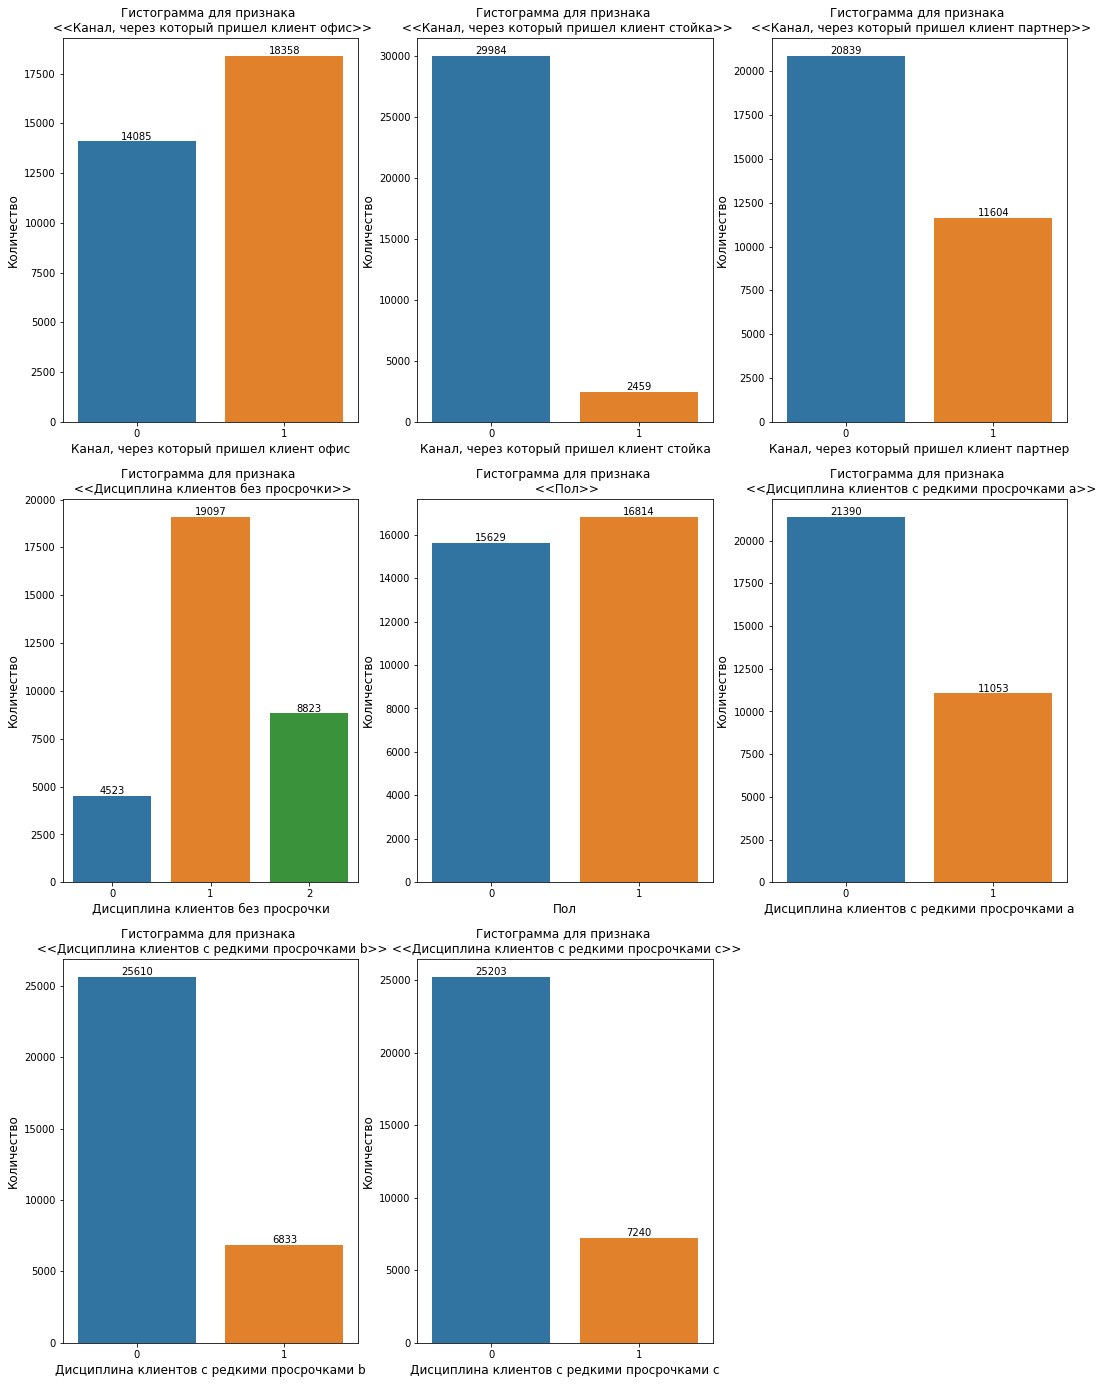

In [332]:
fig, axes = plt.subplots(2, sharey=True, figsize=(18,24))
i=0
for i, col in enumerate(cat_var):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(x=col, data=df1)
    plt.title("Гистограмма для признака \n <<{}>>".format(dict_to_rus[col]))
    plt.xlabel(dict_to_rus[col], fontsize = 12)
    plt.ylabel('Количество', fontsize = 12)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate(#'{:d} ({:.1f}%)'.format(p.get_height(), 100.*y/df.shape[0]),
            '{:d}'.format(p.get_height()), 
            (x.mean(), y),ha='center', va='bottom', fontsize = 10)

**Промежуточный вывод:** Видим, что исследуемые признаки имеют корректные значения. 

Примерно половина всех клиентов привлечена в целях кредита офисом, треть обратилась через партнерский канал, а небольшая часть около 6% клиентов пришла через стойку в торговых сетях.

Мужчин немного больше, чем женщин в выборке.

Клиенты без просрочек большинство имеют класс GOOD.
Клиенты с редкими просрочками по убыванию классы а, c и b

▶ Интервальные признаки

In [333]:
int_var = ['kolvo_per', 'kolvo_per_do1sms', 'kolvo_per_posle1sms','kolvo_per_dokred','kolvo_per_poslekred', 'tip_perev', 'geografy_perev','vozrast','sum_perev' ,'max_sum','sred_sum', 'sum_perev_dokred', 'sum_perev_dokredgod', 'kolvo_sms_dootklika','dnei_s_sms']

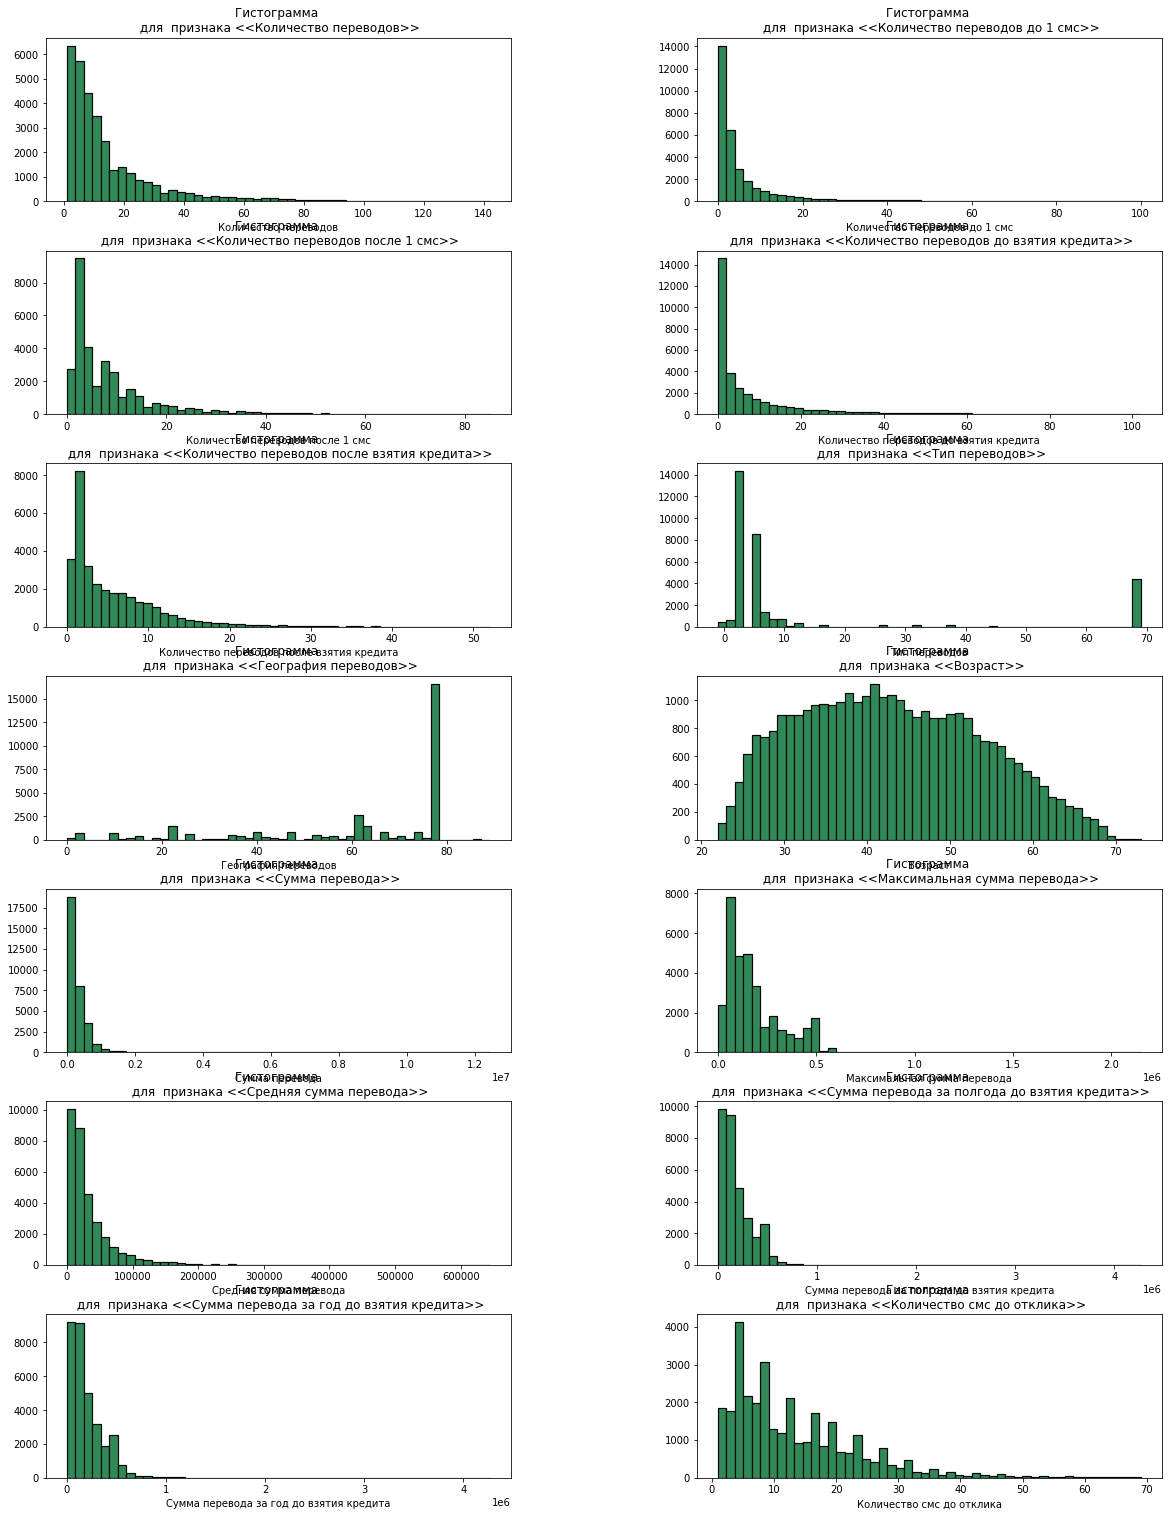

In [351]:
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize=(20,40))
plt.subplots_adjust(hspace=0.3,wspace=0.4,top=0.6,bottom=0.1)
i = 0
l = 0
j = 0
for i in range(7):
    for j in range(2):
        axes[i, j].hist(df1[int_var[l]], bins = 50, color = "seagreen", edgecolor='black', linewidth=1.2)
        axes[i, j].set_title("Гистограмма \n для  признака <<{}>>".format(dict_to_rus[int_var[l]]))
        axes[i, j].set_xlabel(dict_to_rus[int_var[l]])
        l+=1
        

**Промежуточный вывод:** 

Можно отметить, что большинство клиентов после первой смс о задолженности 
вносят платеж;

количество переводов после взятия кредита больше, чем количество переводов до взятия кредита, что представляется логичным;

возраст кредитуемых без аномалий укладывается в стандартную банковскую практику;

в результате анализа и устоявшейся практики есть понимание, что признак "География переводов" как и "тип перевода" является скорее категориальным, чем интервальным. в условиях ограниченного временного ресурса принято решение не учитывать их влияние в дальнейшем анализе; однако из данных видно, что подавляющее число клиентов находится в Москве, Санкт-Петербурге, Ростовской области, Краснодарском крае и в Рязанской области.

Количество смс до отклика коррелируется с количеством переводов после 1 смс, те большинство клиентов реагируют внесением необходимой суммы в счет погашения после 1 смс.






### Вывод 

На данном этапе проведена предобработка данных:
- исправлены заголовки признаков;
- удалены несущественные признаки;
- исследованы типы признаков. Установленные типы данных соответствуют содержательному смыслу признаков; 
- изучены признаки, исходя из значений описательных статистик;
- проведен поиск и удаление дублирующихся записей; 
- проведен анализ аномальных наблюдений. Обнаружены выбросы; 
- проведен анализ пропущенных значений.
- подготовленные данные визуализированы в разрезе категориальных и интервальных признаков

Таким образом, имеющиеся данные подготовлены для дальнейшего анализа. 

---

# Шаг 3. Исследовательский анализ данных 

Целевой признак 'Дисциплина клиентов без просрочки' имеет значения: 'BAD', 'GOOD', 'MIDDLE'. Выявим какие-либо различия в характеристиках признаков (по группам 'BAD', 'GOOD', 'MIDDLE') и сформулируем соответствующие гипотезы:
- изучение распределений признаков (категориальные/интервальные) по группам ( 'BAD', 'GOOD', 'MIDDLE') + визуализация;
- корреляционный анализ;
- построение портретов клиентов предполагает кластеризацию: воспользуемся иерархическими методами, построим дендрограммы (в разрезе 'BAD', 'GOOD', 'MIDDLE') + метод локтя --- позволить определить оптимальное число кластеров. Далее метод `k-средних` и анализ кластеров по признакам.
- проведем кластеризацию по всему датасету и оценим кластеры в разрезе признаков.
- построить классификационную модель, например, логистическую регрессию, и посмотреть на важность признаков.


In [335]:
df1

,mdm_id,kolvo_per,kolvo_per_do1sms,kolvo_per_posle1sms,kolvo_per_dokred,kolvo_per_poslekred,tip_perev,geografy_perev,sum_perev,max_sum,sred_sum,sum_perev_dokred,sum_perev_dokredgod,kolvo_sms_dootklika,dnei_s_sms,vozrast,pol_new,client_bez_pr_new,client_s_pr_a,client_s_pr_b,client_s_pr_c,canal_privl_ofis,canal_privl_partner,canal_privl_stoika
1715,11142665,1.00,1.00,0.00,1.00,0.00,2.00,77.00,21000.00,21000.00,21000.00,0.00,21000.00,6.00,174.00,30.00,0,2,0,0,0,1,0,0
1716,11078257,1.00,1.00,0.00,1.00,0.00,2.00,77.00,50.00,50.00,50.00,0.00,50.00,4.00,146.00,28.00,1,1,1,0,0,1,0,0
1717,14163718,1.00,1.00,0.00,1.00,0.00,5.00,77.00,156127.00,156127.00,156127.00,0.00,0.00,22.00,578.00,48.00,0,1,1,0,0,1,0,0
1719,10337953,1.00,1.00,0.00,1.00,0.00,2.00,77.00,150.00,150.00,150.00,0.00,150.00,5.00,162.00,25.00,1,0,0,0,0,1,0,0
1724,15835957,1.00,1.00,0.00,1.00,0.00,45.00,77.00,9500.00,9500.00,9500.00,0.00,0.00,4.00,468.00,27.00,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49600,10919395,92.00,8.00,84.00,60.00,32.00,2.00,77.00,443307.00,165000.00,4818.55,293517.00,367217.00,9.00,205.00,57.00,1,1,1,0,0,1,0,0
49605,14730182,93.00,9.00,84.00,44.00,49.00,2.00,77.00,535750.00,203200.00,5760.75,58000.00,173441.00,1.00,366.00,29.00,1,2,1,0,0,0,1,0
49607,22156029,93.00,9.00,84.00,72.00,21.00,0.00,77.00,832700.00,55000.00,8953.76,476500.00,548500.00,17.00,579.00,41.00,0,1,0,1,0,1,0,0
49611,22907106,98.00,14.00,84.00,57.00,41.00,2.00,77.00,778469.80,150000.00,7943.57,254150.00,382900.00,23.00,603.00,43.00,1,2,0,0,0,1,0,0


# Изучение признаков по группам: интервальные признаки
▶ Для интервальных признаков, выделенных выше, исследуем средние по группам для датафрейма. В качестве оценок средних воспользуемся выборочном средним и медианой. 
Для понимания значений признака client_bez_pr_new определим, что
0 - BAD, 1 - GOOD, 2 - MIDDLE 

In [336]:
df_mean = df1.loc[:, df1.columns != 'mdm_id'].groupby('client_bez_pr_new')[int_var].agg('mean').T
df_median = df1.loc[:, df1.columns != 'mdm_id'].groupby('client_bez_pr_new')[int_var].agg('median').T

In [337]:
df_temp = pd.concat([df_mean, df_median], axis = 1)
df_temp.columns = ['Выборочное_среднее_для_группы_BAD',
                   'Выборочное_среднее_для_GOOD',
                   'Выборочное_среднее_для_MIDDLE',
                   'Медиана_для_группы_BAD',
                   'Медиана_для_группы_GOOD',
                   'Медиана_для_группы_MIDDLE'
                   ] 

In [338]:
df_mean

client_bez_pr_new,0,1,2
kolvo_per,11.63,15.37,16.90
kolvo_per_do1sms,5.07,6.50,6.75
kolvo_per_posle1sms,6.56,8.86,10.15
kolvo_per_dokred,7.19,9.24,9.72
kolvo_per_poslekred,4.44,6.13,7.17
tip_perev,11.43,14.83,10.48
geografy_perev,60.55,62.48,61.38
vozrast,40.08,44.22,41.77
sum_perev,255336.41,313346.06,310337.45
max_sum,167023.70,183332.94,173917.10


In [339]:
df_median

client_bez_pr_new,0,1,2
kolvo_per,7.00,9.00,11.00
kolvo_per_do1sms,2.00,2.00,2.00
kolvo_per_posle1sms,4.00,5.00,7.00
kolvo_per_dokred,2.00,3.00,4.00
kolvo_per_poslekred,3.00,4.00,5.00
tip_perev,2.00,5.00,5.00
geografy_perev,74.00,77.00,77.00
vozrast,39.00,44.00,41.00
sum_perev,168292.00,212777.66,207450.00
max_sum,125000.00,145000.00,135000.00


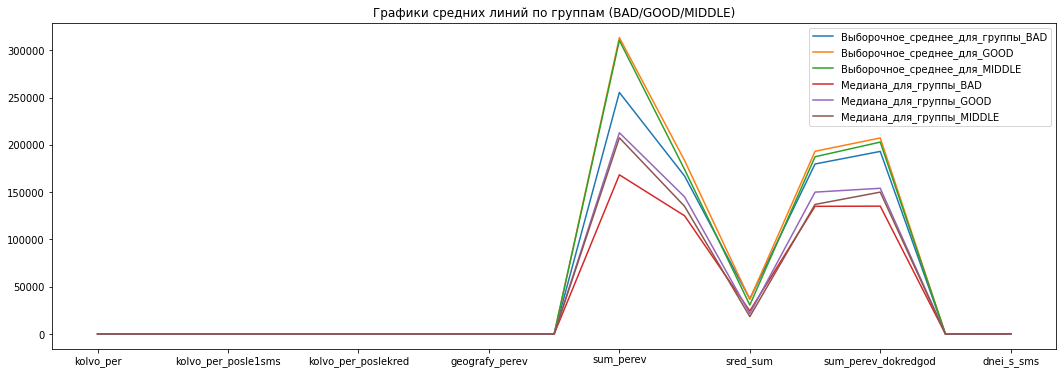

In [340]:
df_temp.plot(kind='line', figsize=(18,6), title='Графики средних линий по группам (BAD/GOOD/MIDDLE)');

In [341]:
df_temp

,Выборочное_среднее_для_группы_BAD,Выборочное_среднее_для_GOOD,Выборочное_среднее_для_MIDDLE,Медиана_для_группы_BAD,Медиана_для_группы_GOOD,Медиана_для_группы_MIDDLE
kolvo_per,11.63,15.37,16.90,7.00,9.00,11.00
kolvo_per_do1sms,5.07,6.50,6.75,2.00,2.00,2.00
kolvo_per_posle1sms,6.56,8.86,10.15,4.00,5.00,7.00
kolvo_per_dokred,7.19,9.24,9.72,2.00,3.00,4.00
kolvo_per_poslekred,4.44,6.13,7.17,3.00,4.00,5.00
tip_perev,11.43,14.83,10.48,2.00,5.00,5.00
geografy_perev,60.55,62.48,61.38,74.00,77.00,77.00
vozrast,40.08,44.22,41.77,39.00,44.00,41.00
sum_perev,255336.41,313346.06,310337.45,168292.00,212777.66,207450.00
max_sum,167023.70,183332.94,173917.10,125000.00,145000.00,135000.00


Промежуточный вывод: Проведем предварительный анализ рассчитанных статистик по  признакам по трем классам сразу:

 по признаку kolvo_per_do1sms, kolvo_per_dokred существенных различий по значениям средних не наблюдается;
 по признаку vozrast наблюдаются различия по значениям средних. Видим, что в среднем клиенты в возрасте 44 года относятся к классу GOOD, а более младшие клиенты к BAD, MIDDLE.
 по большинству признаков превалирует класс GOOD, немного опережая по всем значениям; это может быть связано с количеством клиентов, в совокупности относящихся к данному классу.
 по признаку geografy_perev медианные значения показывают, что большинство клиентов классов GOOD и MIDDLE находятся в Москве


▶  Визуализация интервальных признаков датафрейма

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

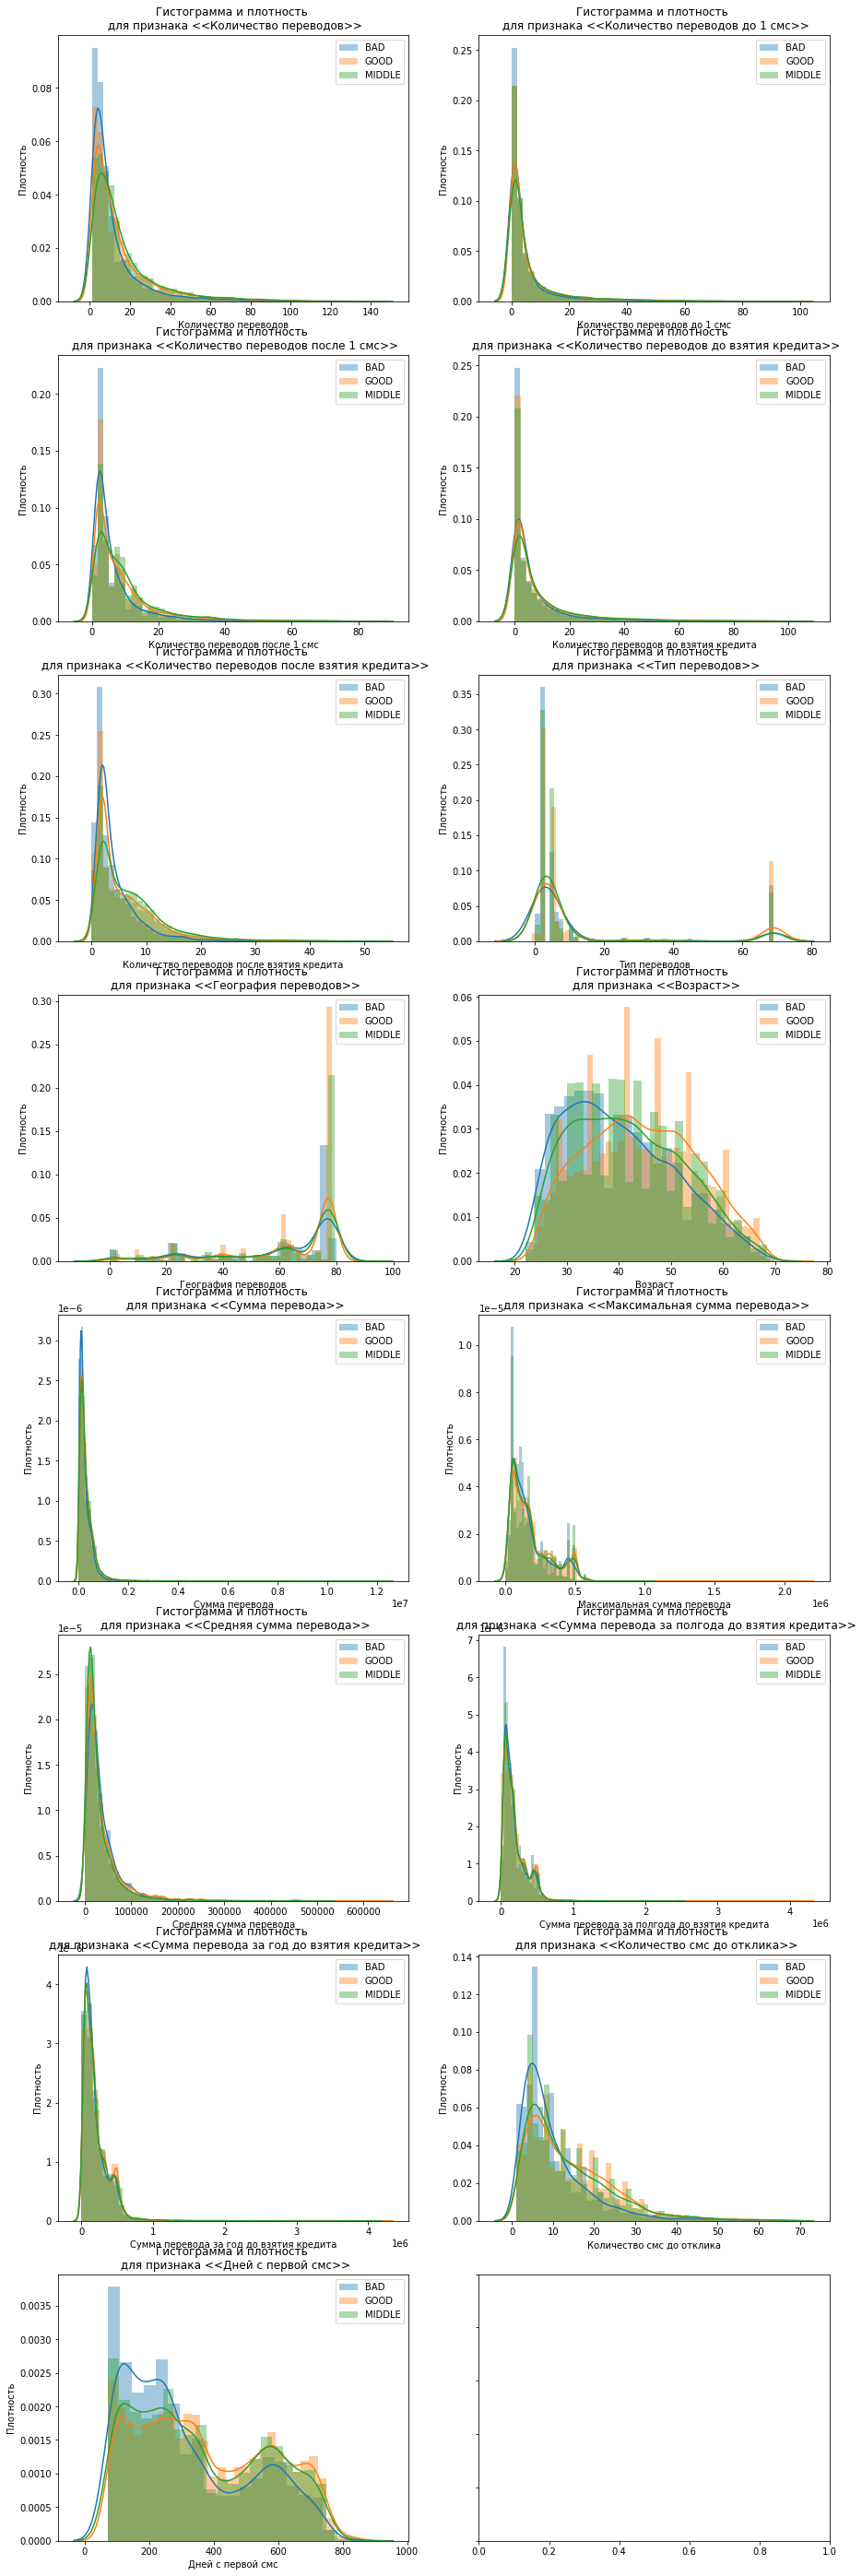

In [342]:
fig, axes = plt.subplots(8, 2, sharey=True, figsize=(15,50))
i=0
for i, col in enumerate(int_var):
    plt.subplot(8,2,i+1)
    ax = sns.distplot(df1[df1.client_bez_pr_new == 0][col], label = 'BAD', )
    ax = sns.distplot(df1[df1.client_bez_pr_new == 1][col], label = 'GOOD')
    ax = sns.distplot(df1[df1.client_bez_pr_new == 2][col], label = 'MIDDLE')
    plt.title("Гистограмма и плотность \n для признака <<{}>>".format(dict_to_rus[col]))
    plt.xlabel(dict_to_rus[col])
    plt.ylabel('Плотность')
    plt.legend()

**Промежуточный вывод по интервальным признакам:** 
Полученные графики позволяют:
-  выдвинуть гипотезу о том, что имеется статистически значимое различие между средним возрастом и клиентами, относящимися к тому или иному классу GOOD/MIDDLE/BAD ;
- выдвинуть гипотезу о том, что величина количества переводов до взятия кредита статистически значима в зависимости от класса GOOD/MIDDLE/BAD;
-  по другим признакам исследуемых классов GOOD/MIDDLE/BAD невозможно выдвинуть подобные гипотезы, поскольку представленные плотности распределений (нормальное и равномерное) очень схожи. 

# Изучение признаков по группам: категориальные признаки

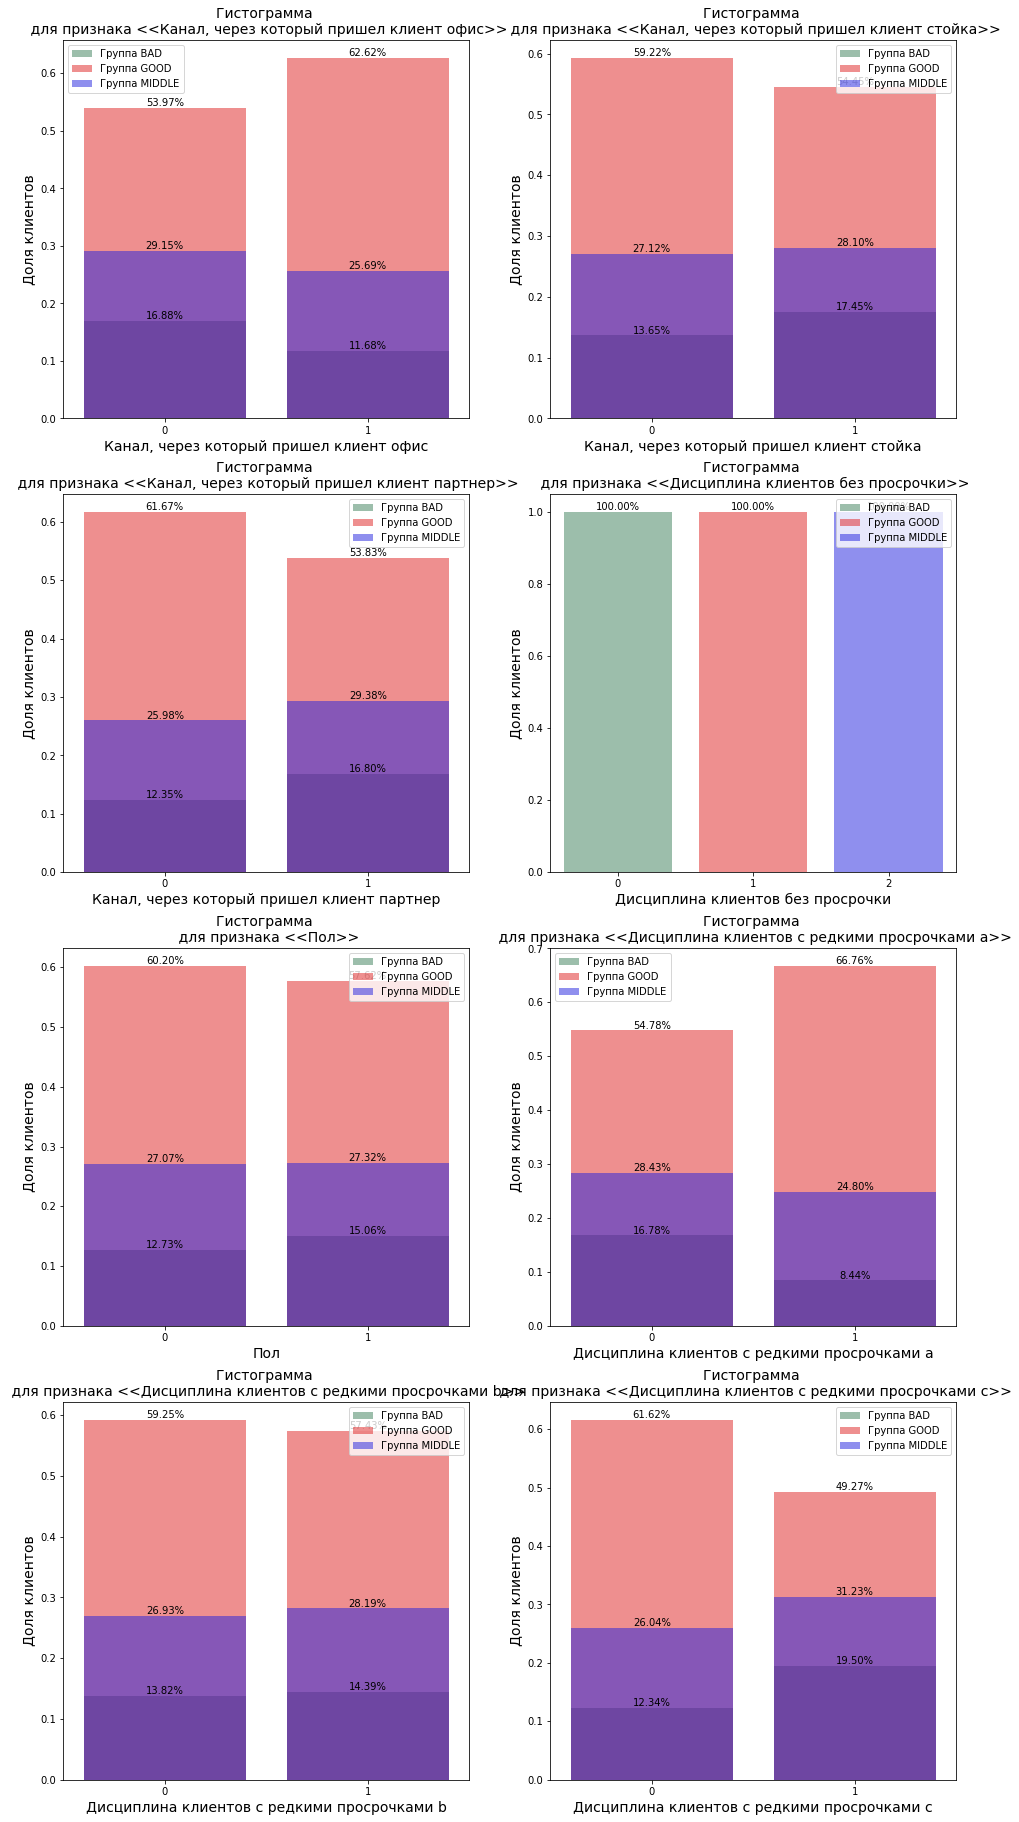

In [343]:
fig, axes = plt.subplots(4, figsize=(16,32))
i=0
for i, col in enumerate(cat_var):
    plt.subplot(4,2,i+1)
    data_all = df1[col].value_counts()
    r = (pd.DataFrame([df1[df1.client_bez_pr_new == 0][col].value_counts()/data_all, 
              df1[df1.client_bez_pr_new == 1][col].value_counts()/data_all,
              df1[df1.client_bez_pr_new == 2][col].value_counts()/data_all]).T)
    r.columns = ['0','1','2']
    ax1 = sns.barplot(x = r.index, y = r['0'], data = r, color='seagreen',
                      alpha = 0.5, label = 'Группа BAD')
    ax2 = sns.barplot(x = r.index, y = r['1'], data = r, color='red', 
                      alpha = 0.5, label = 'Группа GOOD')
    ax3 = sns.barplot(x = r.index, y = r['2'], data = r, color='blue', 
                      alpha = 0.5, label = 'Группа MIDDLE')
    plt.title("Гистограмма \n для признака <<{}>>".format(dict_to_rus[col]), fontsize = 14)
    plt.xlabel(dict_to_rus[col], fontsize = 14)
    plt.ylabel('Доля клиентов', fontsize = 14)
    plt.legend()
    for p in ax1.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax1.annotate('{:.2f}%'.format(100*y), 
            (x.mean(), y),ha='center', va='bottom', fontsize = 10)

Промежуточный вывод: Проведем анализ построенных гистограмм для категориальных признаков:

- % соотношение клиентов, обратившихся через канал привлечения офис относящихся к категории GOOD почти 63%;
- доля клиентов, пришедших через стойку имеет почти равное значение для категорий BAD/MIDDLE и GOOD с незначительным статистическим перевесом в сторону последнего;
- клиенты, обратившиеся через партнерскй канал также имеют более низкое % соотношение класса GOOD  к остальным;
 Можно провести гипотезу о том, что через канал офис приходят более благонадежные клиенты (если это укдладывается в контекст класса GOOD).

# Матрица корреляций

In [344]:
df1

,mdm_id,kolvo_per,kolvo_per_do1sms,kolvo_per_posle1sms,kolvo_per_dokred,kolvo_per_poslekred,tip_perev,geografy_perev,sum_perev,max_sum,sred_sum,sum_perev_dokred,sum_perev_dokredgod,kolvo_sms_dootklika,dnei_s_sms,vozrast,pol_new,client_bez_pr_new,client_s_pr_a,client_s_pr_b,client_s_pr_c,canal_privl_ofis,canal_privl_partner,canal_privl_stoika
1715,11142665,1.00,1.00,0.00,1.00,0.00,2.00,77.00,21000.00,21000.00,21000.00,0.00,21000.00,6.00,174.00,30.00,0,2,0,0,0,1,0,0
1716,11078257,1.00,1.00,0.00,1.00,0.00,2.00,77.00,50.00,50.00,50.00,0.00,50.00,4.00,146.00,28.00,1,1,1,0,0,1,0,0
1717,14163718,1.00,1.00,0.00,1.00,0.00,5.00,77.00,156127.00,156127.00,156127.00,0.00,0.00,22.00,578.00,48.00,0,1,1,0,0,1,0,0
1719,10337953,1.00,1.00,0.00,1.00,0.00,2.00,77.00,150.00,150.00,150.00,0.00,150.00,5.00,162.00,25.00,1,0,0,0,0,1,0,0
1724,15835957,1.00,1.00,0.00,1.00,0.00,45.00,77.00,9500.00,9500.00,9500.00,0.00,0.00,4.00,468.00,27.00,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49600,10919395,92.00,8.00,84.00,60.00,32.00,2.00,77.00,443307.00,165000.00,4818.55,293517.00,367217.00,9.00,205.00,57.00,1,1,1,0,0,1,0,0
49605,14730182,93.00,9.00,84.00,44.00,49.00,2.00,77.00,535750.00,203200.00,5760.75,58000.00,173441.00,1.00,366.00,29.00,1,2,1,0,0,0,1,0
49607,22156029,93.00,9.00,84.00,72.00,21.00,0.00,77.00,832700.00,55000.00,8953.76,476500.00,548500.00,17.00,579.00,41.00,0,1,0,1,0,1,0,0
49611,22907106,98.00,14.00,84.00,57.00,41.00,2.00,77.00,778469.80,150000.00,7943.57,254150.00,382900.00,23.00,603.00,43.00,1,2,0,0,0,1,0,0


In [345]:
df1[[]].corr()

""


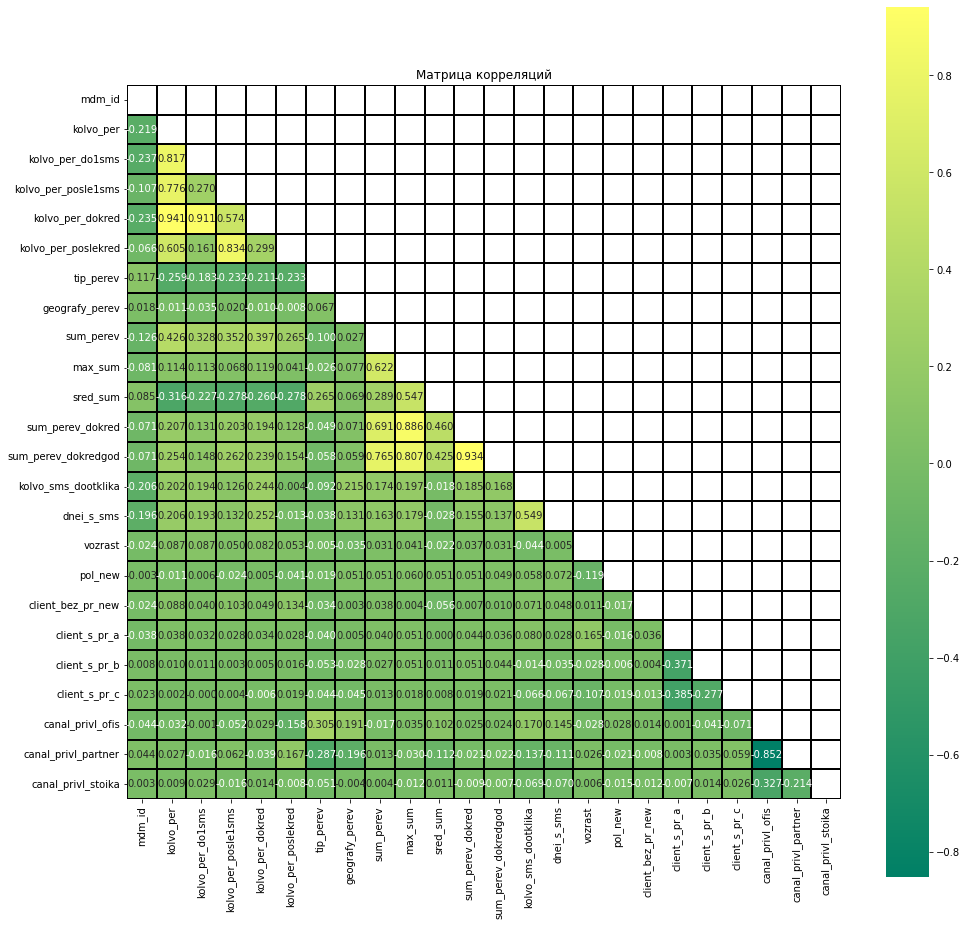

In [346]:
fig, ax = plt.subplots(figsize=(16,16))
ax = sns.heatmap(data = df1.corr(), 
                 annot=True, 
                 square=True, 
                 cmap='summer', 
                 fmt='.3f', 
                 linewidths=1, 
                 linecolor='black', 
                 mask=np.triu(df1.corr()))
plt.title('Матрица корреляций')
plt.show()

для сравнения выбираем следущие признаки:


*  kolvo_per
*  kolvo_per_posle1sms
*   sum_perev_dokredgod
*   sum_perev_dokred
*   kolvo_per_poslekred
*   kolvo_per_dokred
*   sum_perev
*  max_sum 
*   kolvo_per_do1sms





kolvo_per_dokred и kolvo_per - признаки с наиболее сильной корреляцией;
 

 Промежуточный вывод по матрице корреляций: Видим, что целевой признак client_bez_pr_new не имеет каких-либо значимых коэффициентов коэффициентов корреляции с другими  признаками. Отмечаются, однако интересные корреляции между признаками canal_privl_ofis и tip_perev (чем больше значение типа перевода (77 - Москва, 78-Санкт-Петербург, тем выше вероятность, что клиент привлечен офисом). Логически обоснованная корреляция между признаками: dnei_s_sms и kolvo_sms_dootklika.
Отмечу также, что признак sum_perev и kolvo_per и также имеют среднюю корреляцию, что может говорить о том, что клиентская база стабильна.

Для смещения таргета попробуем удалить один из признаков, например kolvo_per_poslekred




In [347]:
df2 = df1.drop(['kolvo_per_poslekred'], axis = 1)

In [348]:
df2

,mdm_id,kolvo_per,kolvo_per_do1sms,kolvo_per_posle1sms,kolvo_per_dokred,tip_perev,geografy_perev,sum_perev,max_sum,sred_sum,sum_perev_dokred,sum_perev_dokredgod,kolvo_sms_dootklika,dnei_s_sms,vozrast,pol_new,client_bez_pr_new,client_s_pr_a,client_s_pr_b,client_s_pr_c,canal_privl_ofis,canal_privl_partner,canal_privl_stoika
1715,11142665,1.00,1.00,0.00,1.00,2.00,77.00,21000.00,21000.00,21000.00,0.00,21000.00,6.00,174.00,30.00,0,2,0,0,0,1,0,0
1716,11078257,1.00,1.00,0.00,1.00,2.00,77.00,50.00,50.00,50.00,0.00,50.00,4.00,146.00,28.00,1,1,1,0,0,1,0,0
1717,14163718,1.00,1.00,0.00,1.00,5.00,77.00,156127.00,156127.00,156127.00,0.00,0.00,22.00,578.00,48.00,0,1,1,0,0,1,0,0
1719,10337953,1.00,1.00,0.00,1.00,2.00,77.00,150.00,150.00,150.00,0.00,150.00,5.00,162.00,25.00,1,0,0,0,0,1,0,0
1724,15835957,1.00,1.00,0.00,1.00,45.00,77.00,9500.00,9500.00,9500.00,0.00,0.00,4.00,468.00,27.00,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49600,10919395,92.00,8.00,84.00,60.00,2.00,77.00,443307.00,165000.00,4818.55,293517.00,367217.00,9.00,205.00,57.00,1,1,1,0,0,1,0,0
49605,14730182,93.00,9.00,84.00,44.00,2.00,77.00,535750.00,203200.00,5760.75,58000.00,173441.00,1.00,366.00,29.00,1,2,1,0,0,0,1,0
49607,22156029,93.00,9.00,84.00,72.00,0.00,77.00,832700.00,55000.00,8953.76,476500.00,548500.00,17.00,579.00,41.00,0,1,0,1,0,1,0,0
49611,22907106,98.00,14.00,84.00,57.00,2.00,77.00,778469.80,150000.00,7943.57,254150.00,382900.00,23.00,603.00,43.00,1,2,0,0,0,1,0,0


In [349]:
df2[[]].corr()

""


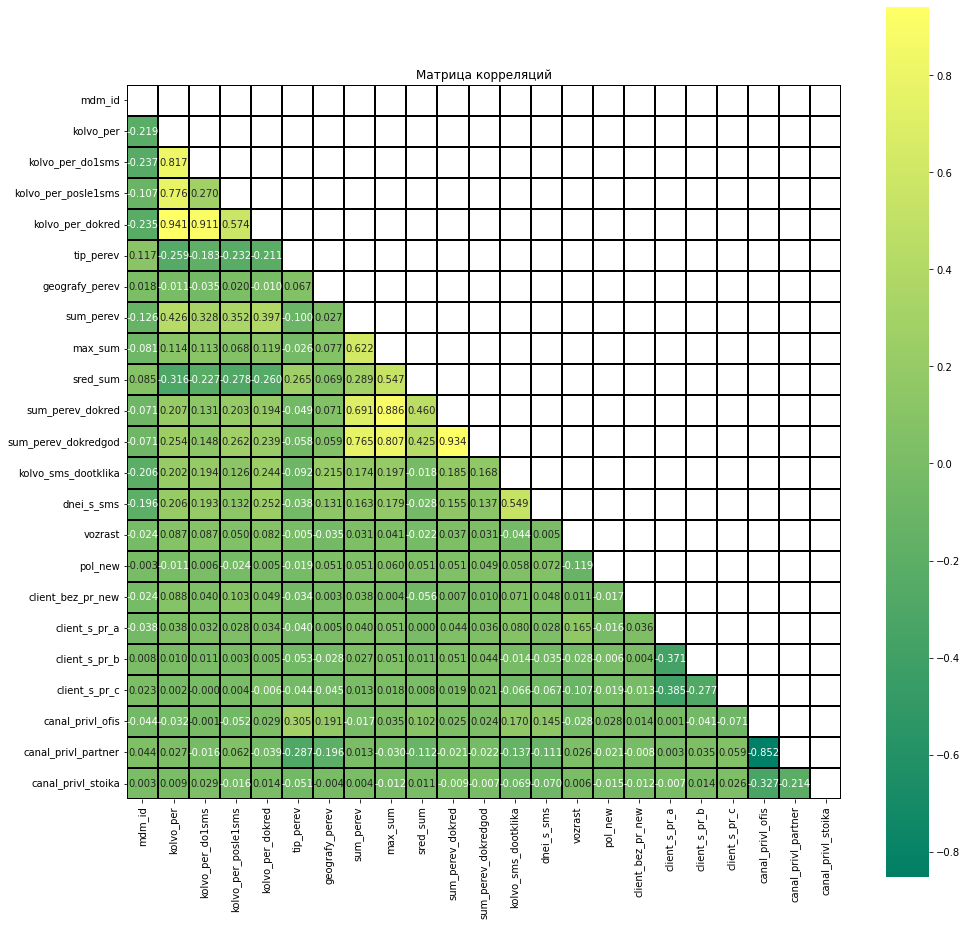

In [350]:
fig, ax = plt.subplots(figsize=(16,16))
ax = sns.heatmap(data = df2.corr(), 
                 annot=True, 
                 square=True, 
                 cmap='summer', 
                 fmt='.3f', 
                 linewidths=1, 
                 linecolor='black', 
                 mask=np.triu(df2.corr()))
plt.title('Матрица корреляций')
plt.show()

Вывод: в данном случае удаление одного из признаков не дало смещения таргета, поэтому делать однозначные выводы о важности признаков на основе данного метода невозможно. Однако, в дальнейшем, они будут учтены при сравнении результатов кластеризации и классификации.

# Шаг 4. Сегментация клиентов методами кластерного анализа
В первую очередь проведем кластеризацию всего датафрейма, оценим признаки в разрезе кластеров.

Далее, проведем кластеризацию в разрезе групп клиентов 'BAD', 'GOOD', 'MIDDLE'. Выделим из датафрейма 'GOOD' клиентов и выполним кластеризацию. Для полной картины кластеризуем и оставшихся клиентов 'BAD' и 'MIDDLE'.
Кластеризацию осуществляем методами: агломеративный алгоритм по Уорду и k-means



# 4.1   Кластеризация датафрейма.




In [352]:
df_to_cluster = df1.drop(columns = 'mdm_id')
df_to_cluster

,kolvo_per,kolvo_per_do1sms,kolvo_per_posle1sms,kolvo_per_dokred,kolvo_per_poslekred,tip_perev,geografy_perev,sum_perev,max_sum,sred_sum,sum_perev_dokred,sum_perev_dokredgod,kolvo_sms_dootklika,dnei_s_sms,vozrast,pol_new,client_bez_pr_new,client_s_pr_a,client_s_pr_b,client_s_pr_c,canal_privl_ofis,canal_privl_partner,canal_privl_stoika
1715,1.00,1.00,0.00,1.00,0.00,2.00,77.00,21000.00,21000.00,21000.00,0.00,21000.00,6.00,174.00,30.00,0,2,0,0,0,1,0,0
1716,1.00,1.00,0.00,1.00,0.00,2.00,77.00,50.00,50.00,50.00,0.00,50.00,4.00,146.00,28.00,1,1,1,0,0,1,0,0
1717,1.00,1.00,0.00,1.00,0.00,5.00,77.00,156127.00,156127.00,156127.00,0.00,0.00,22.00,578.00,48.00,0,1,1,0,0,1,0,0
1719,1.00,1.00,0.00,1.00,0.00,2.00,77.00,150.00,150.00,150.00,0.00,150.00,5.00,162.00,25.00,1,0,0,0,0,1,0,0
1724,1.00,1.00,0.00,1.00,0.00,45.00,77.00,9500.00,9500.00,9500.00,0.00,0.00,4.00,468.00,27.00,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49600,92.00,8.00,84.00,60.00,32.00,2.00,77.00,443307.00,165000.00,4818.55,293517.00,367217.00,9.00,205.00,57.00,1,1,1,0,0,1,0,0
49605,93.00,9.00,84.00,44.00,49.00,2.00,77.00,535750.00,203200.00,5760.75,58000.00,173441.00,1.00,366.00,29.00,1,2,1,0,0,0,1,0
49607,93.00,9.00,84.00,72.00,21.00,0.00,77.00,832700.00,55000.00,8953.76,476500.00,548500.00,17.00,579.00,41.00,0,1,0,1,0,1,0,0
49611,98.00,14.00,84.00,57.00,41.00,2.00,77.00,778469.80,150000.00,7943.57,254150.00,382900.00,23.00,603.00,43.00,1,2,0,0,0,1,0,0


In [353]:
scaler = StandardScaler()
scaler.fit(df_to_cluster)
df_to_fit = scaler.transform(df_to_cluster)

проведем нормализацию

In [354]:
df_to_fit

array([[-0.831, -0.477, -0.865, ...,  0.876, -0.746, -0.286],
       [-0.831, -0.477, -0.865, ...,  0.876, -0.746, -0.286],
       [-0.831, -0.477, -0.865, ...,  0.876, -0.746, -0.286],
       ...,
       [ 4.528,  0.234,  7.306, ...,  0.876, -0.746, -0.286],
       [ 4.819,  0.678,  7.306, ...,  0.876, -0.746, -0.286],
       [ 4.237, -0.300,  7.403, ..., -1.142,  1.340, -0.286]])

In [355]:
mergings = linkage(df_to_fit, 
                   method='ward')

In [356]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
mergings[:10]

array([[ 3914.000,  4285.000,  0.072,  2.000],
       [ 4274.000,  4296.000,  0.081,  2.000],
       [ 3347.000,  4303.000,  0.094,  2.000],
       [ 19745.000,  19812.000,  0.111,  2.000],
       [ 3585.000,  4251.000,  0.112,  2.000],
       [ 3617.000,  3820.000,  0.117,  2.000],
       [ 3784.000,  3954.000,  0.126,  2.000],
       [ 5004.000,  6336.000,  0.136,  2.000],
       [ 3212.000,  3926.000,  0.140,  2.000],
       [ 17324.000,  17345.000,  0.141,  2.000]])

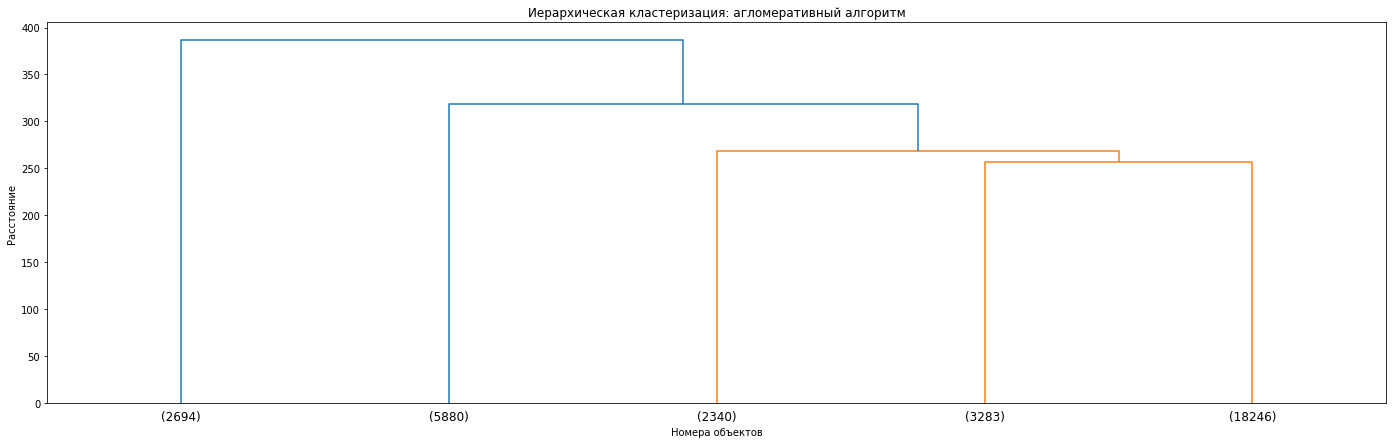

In [357]:
plt.figure(figsize=(24,7))
dendrogram(mergings, 
            p = 5,
            truncate_mode = 'lastp',
           leaf_rotation = 0,
           leaf_font_size = 12)
plt.title('Иерархическая кластеризация: агломеративный алгоритм')
plt.ylabel('Расстояние')
plt.xlabel('Номера объектов')
plt.show()

 ▶  Метод "локтя". Воспользуемся данным методом для определения оптимального числа кластеров

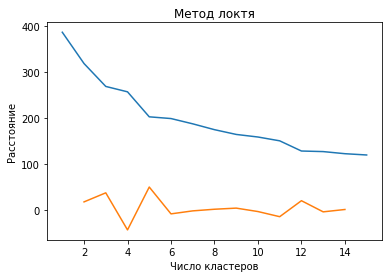

clusters: 5


In [358]:
last = mergings[-15:, 2] 
last_rev = last[::-1] 
idxs = np.arange(1, len(last) + 1,1) 
plt.xlabel('Число кластеров')
plt.ylabel('Расстояние')
plt.title('Метод локтя')
plt.plot(idxs, last_rev) 


acceleration = np.diff(last, 2) 
acceleration_rev = acceleration[::-1] 
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2   
print("clusters:", k)

Оптимальным числом кластеров является k=5.

In [359]:
label=fcluster(mergings, 5, criterion='maxclust')
len(label)

32443

In [360]:
df_to_cluster.loc[:,'сluster_number'] = label 
df_to_cluster.head(20)

,kolvo_per,kolvo_per_do1sms,kolvo_per_posle1sms,kolvo_per_dokred,kolvo_per_poslekred,tip_perev,geografy_perev,sum_perev,max_sum,sred_sum,sum_perev_dokred,sum_perev_dokredgod,kolvo_sms_dootklika,dnei_s_sms,vozrast,pol_new,client_bez_pr_new,client_s_pr_a,client_s_pr_b,client_s_pr_c,canal_privl_ofis,canal_privl_partner,canal_privl_stoika,сluster_number
1715,1.00,1.00,0.00,1.00,0.00,2.00,77.00,21000.00,21000.00,21000.00,0.00,21000.00,6.00,174.00,30.00,0,2,0,0,0,1,0,0,5
1716,1.00,1.00,0.00,1.00,0.00,2.00,77.00,50.00,50.00,50.00,0.00,50.00,4.00,146.00,28.00,1,1,1,0,0,1,0,0,5
1717,1.00,1.00,0.00,1.00,0.00,5.00,77.00,156127.00,156127.00,156127.00,0.00,0.00,22.00,578.00,48.00,0,1,1,0,0,1,0,0,5
1719,1.00,1.00,0.00,1.00,0.00,2.00,77.00,150.00,150.00,150.00,0.00,150.00,5.00,162.00,25.00,1,0,0,0,0,1,0,0,5
1724,1.00,1.00,0.00,1.00,0.00,45.00,77.00,9500.00,9500.00,9500.00,0.00,0.00,4.00,468.00,27.00,1,0,0,0,1,1,0,0,4
1725,1.00,1.00,0.00,1.00,0.00,2.00,23.00,100000.00,100000.00,100000.00,0.00,0.00,4.00,117.00,28.00,1,0,0,0,0,1,0,0,5
1726,1.00,1.00,0.00,1.00,0.00,2.00,77.00,6000.00,6000.00,6000.00,0.00,0.00,11.00,285.00,63.00,1,1,0,0,0,1,0,0,5
1727,1.00,1.00,0.00,1.00,0.00,2.00,77.00,1500.00,1500.00,1500.00,0.00,0.00,8.00,299.00,43.00,1,0,0,1,0,1,0,0,5
1731,1.00,1.00,0.00,1.00,0.00,2.00,77.00,5000.00,5000.00,5000.00,0.00,0.00,13.00,714.00,45.00,1,1,0,0,1,1,0,0,5
1733,1.00,1.00,0.00,1.00,0.00,2.00,77.00,40000.00,40000.00,40000.00,0.00,0.00,20.00,363.00,31.00,1,2,0,0,1,1,0,0,5


In [361]:
df_to_cluster['сluster_number'].value_counts()

5    18246
2     5880
4     3283
1     2694
3     2340
Name: сluster_number, dtype: int64

▶ Теперь проведем неиерархическую кластеризацию: алгоритм k-средних

In [362]:
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2

In [363]:
centroid, opt = kmeans(df_to_fit, 5)

In [364]:
label_claster, dist = vq(df_to_fit, centroid)
print('Массив меток кластеров: ', label_claster)
print('Массив расстояний от элементов до центроидов: ', dist)

Массив меток кластеров:  [1 1 1 ... 3 3 3]
Массив расстояний от элементов до центроидов:  [ 3.312  3.508  4.315 ...  7.387  7.937  9.631]


In [365]:
counts_elem_in_cluster = np.bincount(label_claster)
counts_elem_in_cluster

array([ 5239,  9734,  4032,  2998, 10440])

In [366]:
df_to_cluster.loc[:,'сluster_number_by_k_means']=label_claster
df_to_cluster.head()

,kolvo_per,kolvo_per_do1sms,kolvo_per_posle1sms,kolvo_per_dokred,kolvo_per_poslekred,tip_perev,geografy_perev,sum_perev,max_sum,sred_sum,sum_perev_dokred,sum_perev_dokredgod,kolvo_sms_dootklika,dnei_s_sms,vozrast,pol_new,client_bez_pr_new,client_s_pr_a,client_s_pr_b,client_s_pr_c,canal_privl_ofis,canal_privl_partner,canal_privl_stoika,сluster_number,сluster_number_by_k_means
1715,1.00,1.00,0.00,1.00,0.00,2.00,77.00,21000.00,21000.00,21000.00,0.00,21000.00,6.00,174.00,30.00,0,2,0,0,0,1,0,0,5,1
1716,1.00,1.00,0.00,1.00,0.00,2.00,77.00,50.00,50.00,50.00,0.00,50.00,4.00,146.00,28.00,1,1,1,0,0,1,0,0,5,1
1717,1.00,1.00,0.00,1.00,0.00,5.00,77.00,156127.00,156127.00,156127.00,0.00,0.00,22.00,578.00,48.00,0,1,1,0,0,1,0,0,5,1
1719,1.00,1.00,0.00,1.00,0.00,2.00,77.00,150.00,150.00,150.00,0.00,150.00,5.00,162.00,25.00,1,0,0,0,0,1,0,0,5,1
1724,1.00,1.00,0.00,1.00,0.00,45.00,77.00,9500.00,9500.00,9500.00,0.00,0.00,4.00,468.00,27.00,1,0,0,0,1,1,0,0,4,2


In [367]:
df_to_cluster['сluster_number_by_k_means'].value_counts()

4    10440
1     9734
0     5239
2     4032
3     2998
Name: сluster_number_by_k_means, dtype: int64

В результате с помощью метода k-средних кластеризация прошла с более оптимальным разбиением.Кластеры более равномерны, нет перекосов как в предыдущем методе. Далее при анализе берем за основы результаты метода k-means.

# 4.1. Анализ клиентов методами кластерного анализа в разрезе кластеров.

Проанализируем группы кластеров выделеные методом Неиерархической кластеризации: алгоритм  к -means, т.к. группы после данного метода более равномерно заполнены. 

In [368]:
df2 = df_to_cluster

In [369]:
df2 = df2.astype({'сluster_number':'int64',
                  'сluster_number_by_k_means':'int64'}, errors='ignore')

In [370]:
df2.сluster_number_by_k_means.unique()

array([1, 2, 4, 0, 3])

▶ Кластеризация  клиентов кластера '0'

In [371]:
df2_сluster_number_by_k_means = df2[df2.сluster_number_by_k_means == 0]
X = df2_сluster_number_by_k_means.drop(['сluster_number_by_k_means'], axis = 1)
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

▶ Алгомеративная кластеризация и дендрограмма

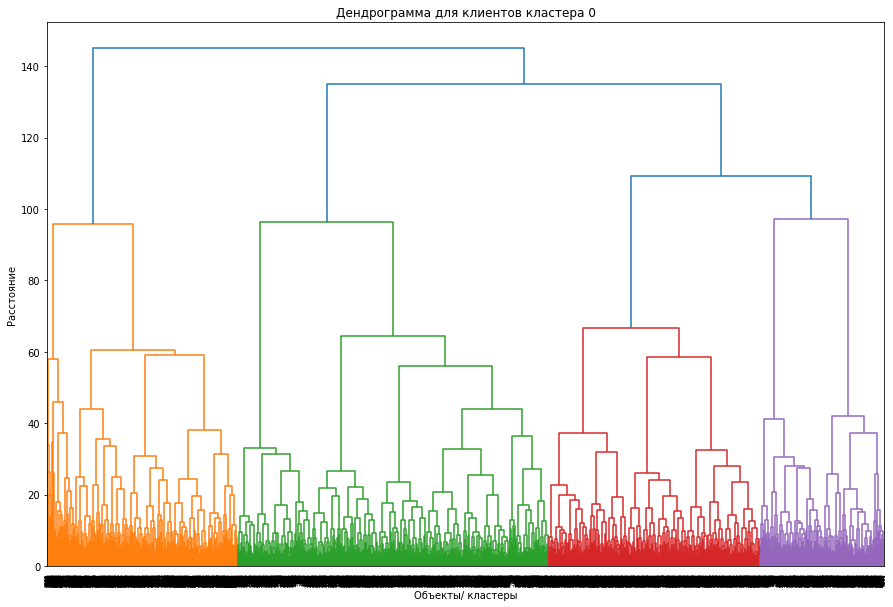

In [372]:
plt.figure(figsize=(15, 10))
Z = linkage(X_st, method='ward') 
plt.title('Дендрограмма для клиентов кластера 0')
plt.xlabel('Объекты/ кластеры')
plt.ylabel('Расстояние')
dendrogram(Z, orientation='top')
plt.show();

▶ Метод "локтя". Воспользуемся данным методом для определения оптимального числа кластеров

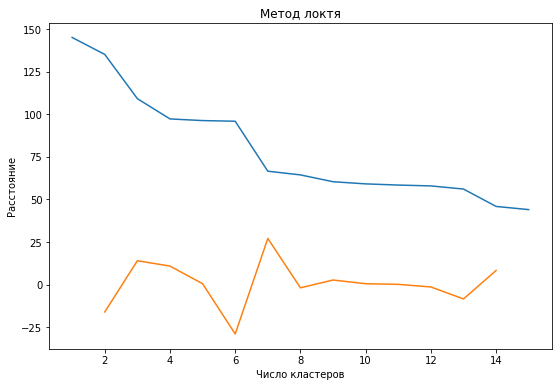

Оптимальное число кластеров: 7


In [373]:
plt.figure(figsize=(9, 6))
last = Z[-15:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1,1)
plt.xlabel('Число кластеров')
plt.ylabel('Расстояние')
plt.title('Метод локтя')
plt.plot(idxs, last_rev)
acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2
print("Оптимальное число кластеров:", k)

 Неиерархическая кластеризация методом `k-means`. Прогнозирование меток кластеров для объектов(клиентов).

Число кластеров `k=7`. 

In [374]:
km = KMeans(n_clusters = 7, random_state = 42)
notagl_cluster_label = km.fit_predict(X_st)

In [376]:
agl_cluster_label = fcluster(Z, 4, criterion='maxclust')
agl_cluster_label

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [377]:
type(agl_cluster_label)

numpy.ndarray

In [378]:
df2_сluster_number_by_k_means = pd.DataFrame(df2_сluster_number_by_k_means)
df2_сluster_number_by_k_means['agl_cluster_label'] = agl_cluster_label
df2_сluster_number_by_k_means['notagl_cluster_label'] = notagl_cluster_label

In [379]:
df2_сluster_number_by_k_means.groupby('agl_cluster_label')['agl_cluster_label'].count()

agl_cluster_label
1    1192
2    1947
3    1325
4     775
Name: agl_cluster_label, dtype: int64

In [380]:
df2_сluster_number_by_k_means.groupby('notagl_cluster_label')['notagl_cluster_label'].count()

notagl_cluster_label
0     379
1    1625
2    1357
3      91
4     892
5     395
6     500
Name: notagl_cluster_label, dtype: int64

In [381]:
rating_cluster = df2_сluster_number_by_k_means.groupby('agl_cluster_label').mean().reset_index().sort_values(by = 'client_bez_pr_new', ascending = False)
rating_cluster.T

,0,3,1,2
agl_cluster_label,1.00,4.00,2.00,3.00
kolvo_per,23.25,11.80,6.56,10.35
kolvo_per_do1sms,9.72,4.74,2.59,2.85
kolvo_per_posle1sms,13.53,7.06,3.97,7.50
kolvo_per_dokred,14.90,6.57,3.45,3.84
kolvo_per_poslekred,8.35,5.22,3.11,6.51
tip_perev,6.08,6.89,19.33,4.38
geografy_perev,64.07,65.21,68.28,57.85
sum_perev,1005381.83,535664.35,515292.13,607271.96
max_sum,432836.62,367465.72,430012.91,427768.31


In [382]:
rating_cluster_k_means = df2_сluster_number_by_k_means.groupby('notagl_cluster_label').mean().reset_index().sort_values(by = 'client_bez_pr_new', ascending = False)
rating_cluster_k_means.T

,0,4,3,1,6,2,5
notagl_cluster_label,0.00,4.00,3.00,1.00,6.00,2.00,5.00
kolvo_per,12.70,26.25,28.01,8.12,3.29,10.01,10.50
kolvo_per_do1sms,4.15,11.73,8.55,3.30,0.87,2.74,4.44
kolvo_per_posle1sms,8.55,14.52,19.46,4.82,2.42,7.27,6.06
kolvo_per_dokred,6.32,17.76,17.63,4.38,1.09,3.55,5.94
kolvo_per_poslekred,6.38,8.49,10.38,3.74,2.20,6.46,4.56
tip_perev,4.88,5.75,8.31,4.20,64.35,4.32,8.69
geografy_perev,67.25,65.03,62.71,67.97,68.74,57.17,63.08
sum_perev,485608.80,853705.36,2830051.10,541618.66,527163.79,616448.97,602898.98
max_sum,331441.38,430350.02,480782.59,416529.72,467399.92,429167.76,401453.70


▶  Кластеризация  клиентов кластера 1

In [383]:
df2_сluster_number_by_k_means = df2[df2.сluster_number_by_k_means == 1]
X = df2_сluster_number_by_k_means.drop(['сluster_number_by_k_means'], axis = 1)
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

▶  Алгомеративная кластеризация и дендрограмма

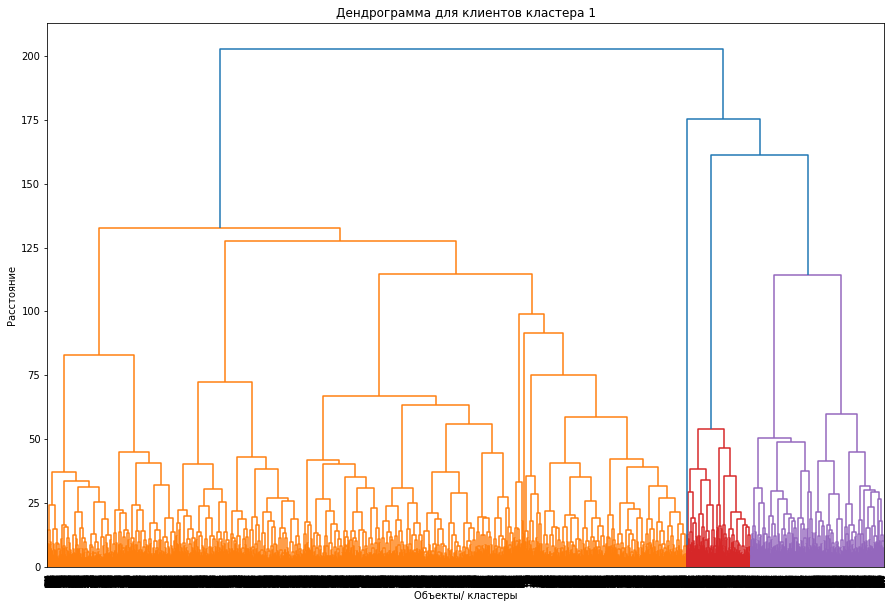

In [384]:
plt.figure(figsize=(15, 10))
Z = linkage(X_st, method='ward') 
plt.title('Дендрограмма для клиентов кластера 1')
plt.xlabel('Объекты/ кластеры')
plt.ylabel('Расстояние')
dendrogram(Z, orientation='top')
plt.show();

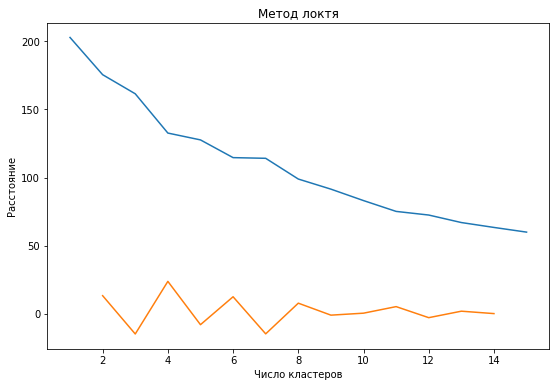

Оптимальное число кластеров: 4


In [385]:
plt.figure(figsize=(9, 6))
last = Z[-15:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1,1)
plt.xlabel('Число кластеров')
plt.ylabel('Расстояние')
plt.title('Метод локтя')
plt.plot(idxs, last_rev)
acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2
print("Оптимальное число кластеров:", k)

$\blacktriangleright$ Неиерархическая кластеризация методом `k-means`. Прогнозирование меток кластеров для объектов(клиентов).

Число кластеров `k=4`.

In [386]:
km = KMeans(n_clusters = 4, random_state = 42)
notagl_cluster_label = km.fit_predict(X_st)

In [387]:
agl_cluster_label = fcluster(Z, 4, criterion='maxclust')
agl_cluster_label

array([1, 1, 1, ..., 4, 4, 4], dtype=int32)

In [388]:
df2_сluster_number_by_k_means = pd.DataFrame(df2_сluster_number_by_k_means)
df2_сluster_number_by_k_means['agl_cluster_label'] = agl_cluster_label
df2_сluster_number_by_k_means['notagl_cluster_label'] = notagl_cluster_label

In [389]:
df2_сluster_number_by_k_means.groupby('agl_cluster_label')['agl_cluster_label'].count()

agl_cluster_label
1    7435
2       4
3     745
4    1550
Name: agl_cluster_label, dtype: int64

In [390]:
df2_сluster_number_by_k_means.groupby('notagl_cluster_label')['notagl_cluster_label'].count()

notagl_cluster_label
0    2181
1    4730
2       4
3    2819
Name: notagl_cluster_label, dtype: int64

In [391]:
rating_cluster = df2_сluster_number_by_k_means.groupby('agl_cluster_label').mean().reset_index().sort_values(by = 'client_bez_pr_new', ascending = False)
rating_cluster.T

,3,0,2,1
agl_cluster_label,4.00,1.00,3.00,2.00
kolvo_per,26.08,8.97,13.86,12.25
kolvo_per_do1sms,12.37,3.13,5.90,5.25
kolvo_per_posle1sms,13.71,5.83,7.97,7.00
kolvo_per_dokred,17.72,4.50,8.98,9.75
kolvo_per_poslekred,8.36,4.46,4.89,2.50
tip_perev,3.91,3.95,3.47,1.75
geografy_perev,64.31,64.21,67.91,74.25
sum_perev,266644.99,159179.32,381909.67,181076.25
max_sum,127081.01,111499.11,251877.15,148750.00


In [392]:
rating_cluster_k_means = df2_сluster_number_by_k_means.groupby('notagl_cluster_label').mean().reset_index().sort_values(by = 'client_bez_pr_new', ascending = False)
rating_cluster_k_means.T

,0,3,1,2
notagl_cluster_label,0.00,3.00,1.00,2.00
kolvo_per,25.20,9.97,7.26,12.25
kolvo_per_do1sms,10.79,3.91,2.60,5.25
kolvo_per_posle1sms,14.41,6.06,4.67,7.00
kolvo_per_dokred,16.27,5.63,3.44,9.75
kolvo_per_poslekred,8.93,4.34,3.82,2.50
tip_perev,4.12,3.97,3.77,1.75
geografy_perev,65.29,66.67,62.87,74.25
sum_perev,251892.42,294113.84,106307.91,181076.25
max_sum,120592.07,208137.25,76928.06,148750.00


▶   Кластеризация  клиентов кластера 2

In [393]:
df2_сluster_number_by_k_means = df2[df2.сluster_number_by_k_means == 2]
X = df2_сluster_number_by_k_means.drop(['сluster_number_by_k_means'], axis = 1)
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

▶ Алгомеративная кластеризация и дендрограмма

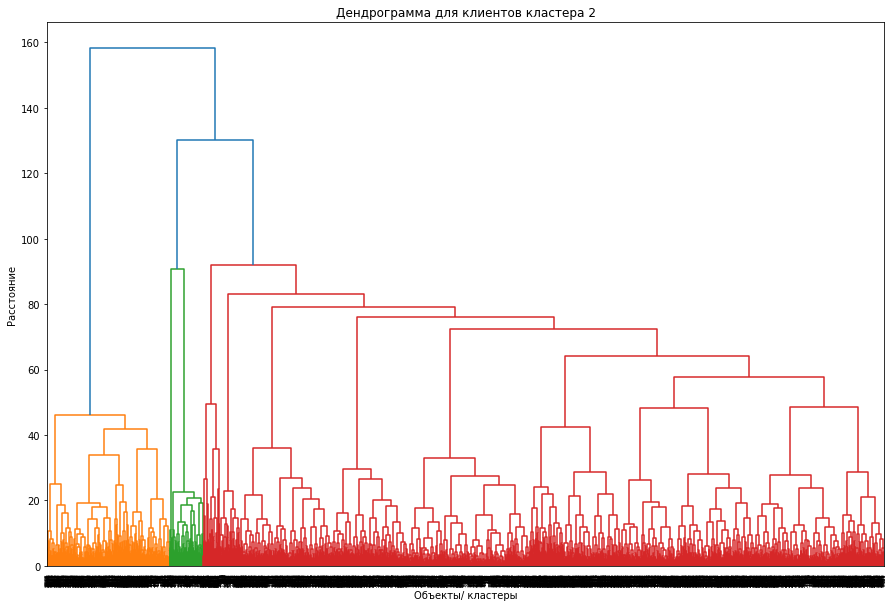

In [394]:
plt.figure(figsize=(15, 10))
Z = linkage(X_st, method='ward') 
plt.title('Дендрограмма для клиентов кластера 2')
plt.xlabel('Объекты/ кластеры')
plt.ylabel('Расстояние')
dendrogram(Z, orientation='top')
plt.show();

$\blacktriangleright$ Метод "локтя". Воспользуемся данным методом для определения оптимального числа кластеров

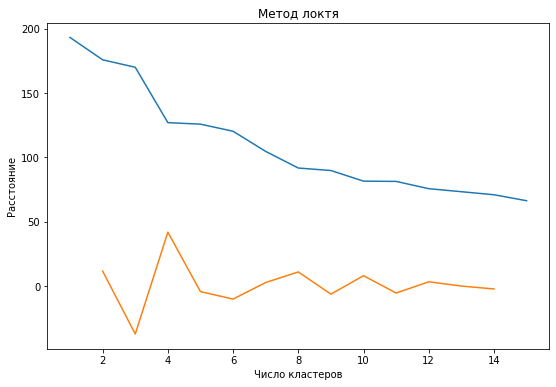

Оптимальное число кластеров: 4


In [190]:
plt.figure(figsize=(9, 6))
last = Z[-15:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1,1)
plt.xlabel('Число кластеров')
plt.ylabel('Расстояние')
plt.title('Метод локтя')
plt.plot(idxs, last_rev)
acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2
print("Оптимальное число кластеров:", k)

$\blacktriangleright$ Неиерархическая кластеризация методом `k-means`. Прогнозирование меток кластеров для объектов(клиентов).

Число кластеров `k=4`.

In [397]:
km = KMeans(n_clusters = 4, random_state = 42)
notagl_cluster_label = km.fit_predict(X_st)

In [400]:
agl_cluster_label = fcluster(Z, 3, criterion='maxclust')
agl_cluster_label

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [401]:
df2_сluster_number_by_k_means = pd.DataFrame(df2_сluster_number_by_k_means)
df2_сluster_number_by_k_means['agl_cluster_label'] = agl_cluster_label
df2_сluster_number_by_k_means['notagl_cluster_label'] = notagl_cluster_label

In [402]:
df2_сluster_number_by_k_means.groupby('agl_cluster_label')['agl_cluster_label'].count()

agl_cluster_label
1     592
2     160
3    3280
Name: agl_cluster_label, dtype: int64

In [403]:
df2_сluster_number_by_k_means.groupby('notagl_cluster_label')['notagl_cluster_label'].count()

notagl_cluster_label
0     619
1     719
2     159
3    2535
Name: notagl_cluster_label, dtype: int64

In [407]:
rating_cluster = df2_сluster_number_by_k_means.groupby('agl_cluster_label').mean().reset_index().sort_values(by = 'client_bez_pr_new', ascending = False)
rating_cluster.T

,0,1,2
agl_cluster_label,1.00,2.00,3.00
kolvo_per,3.25,2.46,3.25
kolvo_per_do1sms,0.87,0.78,0.79
kolvo_per_posle1sms,2.38,1.68,2.46
kolvo_per_dokred,1.01,0.83,0.94
kolvo_per_poslekred,2.24,1.63,2.31
tip_perev,69.00,68.03,67.88
geografy_perev,69.55,70.44,64.93
sum_perev,313123.35,127112.48,119801.33
max_sum,273199.16,116031.46,103658.92


In [406]:
rating_cluster_k_means = df2_сluster_number_by_k_means.groupby('notagl_cluster_label').mean().reset_index().sort_values(by = 'client_bez_pr_new', ascending = False)
rating_cluster_k_means.T

,0,1,2,3
notagl_cluster_label,0.00,1.00,2.00,3.00
kolvo_per,5.84,3.08,2.41,2.67
kolvo_per_do1sms,1.59,0.83,0.78,0.60
kolvo_per_posle1sms,4.26,2.24,1.63,2.07
kolvo_per_dokred,2.11,0.96,0.83,0.67
kolvo_per_poslekred,3.74,2.12,1.58,2.00
tip_perev,67.24,68.64,68.02,68.09
geografy_perev,63.92,68.27,70.40,65.31
sum_perev,184947.96,301012.48,126825.96,97664.42
max_sum,132322.81,266750.35,116132.29,89993.63


▶ Кластеризация  клиентов кластера 3

In [408]:
df2_сluster_number_by_k_means = df2[df2.сluster_number_by_k_means == 3]
X = df2_сluster_number_by_k_means.drop(['сluster_number_by_k_means'], axis = 1)
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

▶ Алгомеративная кластеризация и дендрограмма

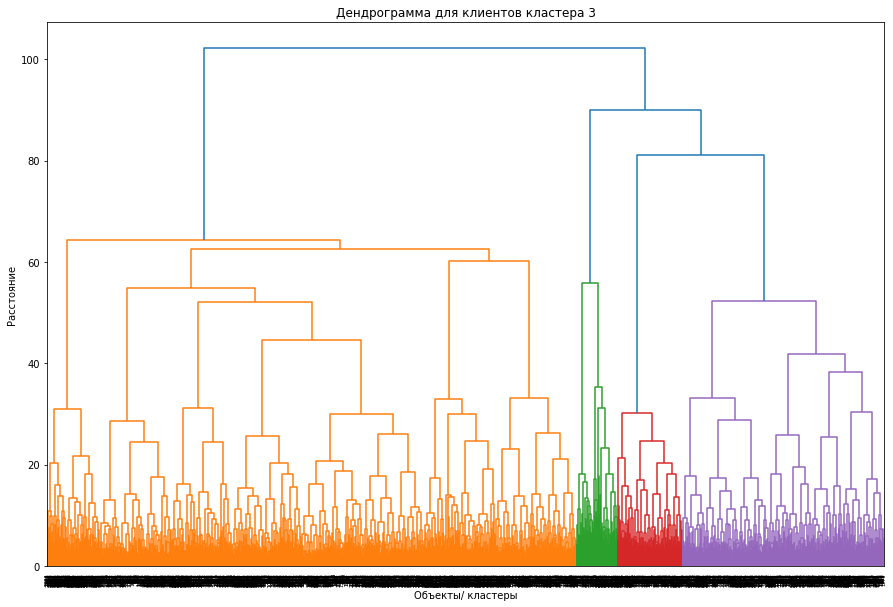

In [409]:
plt.figure(figsize=(15, 10))
Z = linkage(X_st, method='ward') 
plt.title('Дендрограмма для клиентов кластера 3')
plt.xlabel('Объекты/ кластеры')
plt.ylabel('Расстояние')
dendrogram(Z, orientation='top')
plt.show();

In [410]:
agl_cluster_label = fcluster(Z, 4, criterion='maxclust')
agl_cluster_label

array([2, 1, 3, ..., 1, 1, 1], dtype=int32)

▶ Метод "локтя". Воспользуемся данным методом для определения оптимального числа кластеров

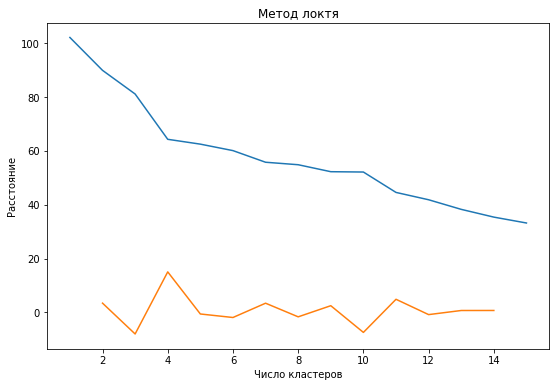

Оптимальное число кластеров: 4


In [411]:
plt.figure(figsize=(9, 6))
last = Z[-15:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1,1)
plt.xlabel('Число кластеров')
plt.ylabel('Расстояние')
plt.title('Метод локтя')
plt.plot(idxs, last_rev)
acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2
print("Оптимальное число кластеров:", k)

▶ Неиерархическая кластеризация методом `k-means`. Прогнозирование меток кластеров для объектов(клиентов).

Число кластеров `k=4`.

In [412]:
km = KMeans(n_clusters = 4, random_state = 42)
notagl_cluster_label = km.fit_predict(X_st)

In [413]:
df2_сluster_number_by_k_means = pd.DataFrame(df2_сluster_number_by_k_means)
df2_сluster_number_by_k_means['agl_cluster_label'] = agl_cluster_label
df2_сluster_number_by_k_means['notagl_cluster_label'] = notagl_cluster_label

In [414]:
df2_сluster_number_by_k_means.groupby('agl_cluster_label')['agl_cluster_label'].count()

agl_cluster_label
1    1898
2     145
3     233
4     722
Name: agl_cluster_label, dtype: int64

In [415]:
df2_сluster_number_by_k_means.groupby('notagl_cluster_label')['notagl_cluster_label'].count()

notagl_cluster_label
0     729
1     580
2     539
3    1150
Name: notagl_cluster_label, dtype: int64

In [416]:
rating_cluster = df2_сluster_number_by_k_means.groupby('agl_cluster_label').mean().reset_index().sort_values(by = 'client_bez_pr_new', ascending = False)
rating_cluster.T

,0,1,2,3
agl_cluster_label,1.00,2.00,3.00,4.00
kolvo_per,58.89,60.52,60.65,56.61
kolvo_per_do1sms,28.84,28.02,34.55,32.89
kolvo_per_posle1sms,30.05,32.50,26.10,23.73
kolvo_per_dokred,44.25,45.83,46.06,43.56
kolvo_per_poslekred,14.64,14.69,14.58,13.05
tip_perev,4.01,19.26,4.21,4.39
geografy_perev,66.70,63.40,64.39,56.03
sum_perev,595971.15,2324427.15,677642.29,584557.90
max_sum,216019.55,324461.01,218788.40,216097.40


In [417]:
rating_cluster_k_means = df2_сluster_number_by_k_means.groupby('notagl_cluster_label').mean().reset_index().sort_values(by = 'client_bez_pr_new', ascending = False)
rating_cluster_k_means.T

,1,2,3,0
notagl_cluster_label,1.00,2.00,3.00,0.00
kolvo_per,83.84,60.85,49.19,51.51
kolvo_per_do1sms,56.86,30.50,19.76,25.31
kolvo_per_posle1sms,26.98,30.35,29.43,26.21
kolvo_per_dokred,72.70,46.38,34.04,36.36
kolvo_per_poslekred,11.14,14.47,15.15,15.15
tip_perev,4.23,7.83,3.80,4.80
geografy_perev,62.40,62.93,67.81,59.19
sum_perev,595497.04,1446899.02,490095.18,492812.52
max_sum,181646.29,413902.25,180851.61,175067.83


▶ Кластеризация  клиентов кластера 4

In [418]:
df2_сluster_number_by_k_means = df2[df2.сluster_number_by_k_means == 4]
X = df2_сluster_number_by_k_means.drop(['сluster_number_by_k_means'], axis = 1)
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

▶ Алгомеративная кластеризация и дендрограмма

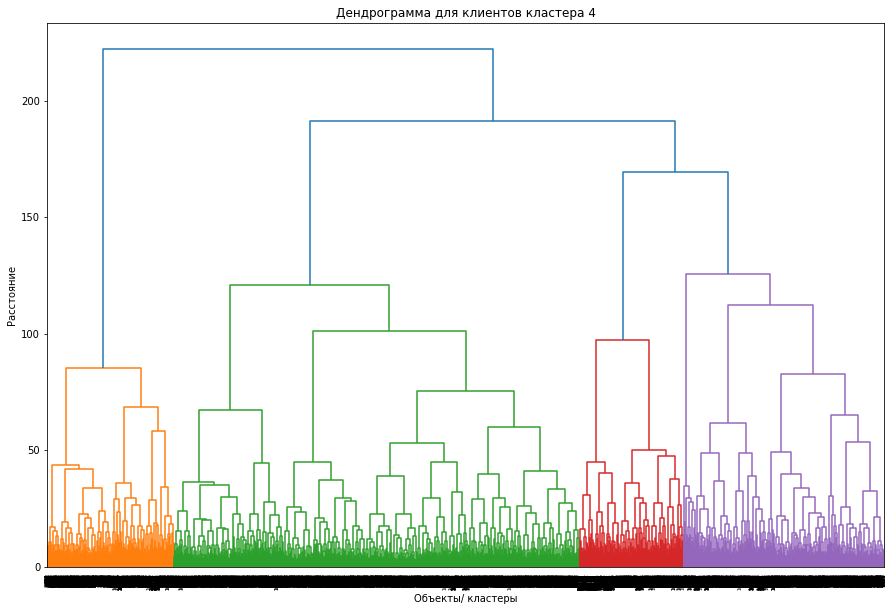

In [419]:
plt.figure(figsize=(15, 10))
Z = linkage(X_st, method='ward') 
plt.title('Дендрограмма для клиентов кластера 4')
plt.xlabel('Объекты/ кластеры')
plt.ylabel('Расстояние')
dendrogram(Z, orientation='top')
plt.show();

In [420]:
agl_cluster_label = fcluster(Z, 4, criterion='maxclust')
agl_cluster_label

array([2, 2, 2, ..., 3, 4, 3], dtype=int32)

▶ Метод "локтя". Воспользуемся данным методом для определения оптимального числа кластеров

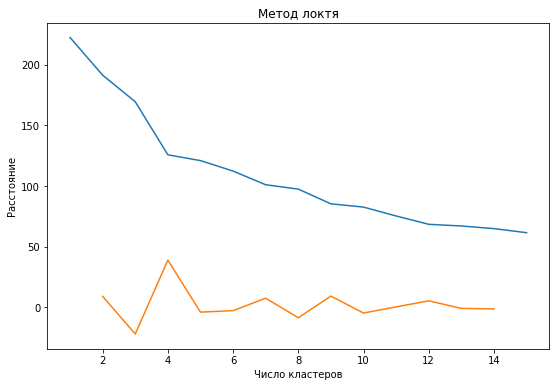

Оптимальное число кластеров: 4


In [421]:
plt.figure(figsize=(9, 6))
last = Z[-15:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1,1)
plt.xlabel('Число кластеров')
plt.ylabel('Расстояние')
plt.title('Метод локтя')
plt.plot(idxs, last_rev)
acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2
print("Оптимальное число кластеров:", k)

$\blacktriangleright$ Неиерархическая кластеризация методом `k-means`. Прогнозирование меток кластеров для объектов(клиентов).

Число кластеров `k=4`.

In [422]:
km = KMeans(n_clusters = 4, random_state = 42)
notagl_cluster_label = km.fit_predict(X_st)

In [423]:
df2_сluster_number_by_k_means = pd.DataFrame(df2_сluster_number_by_k_means)
df2_сluster_number_by_k_means['agl_cluster_label'] = agl_cluster_label
df2_сluster_number_by_k_means['notagl_cluster_label'] = notagl_cluster_label

In [424]:
df2_сluster_number_by_k_means.groupby('agl_cluster_label')['agl_cluster_label'].count()

agl_cluster_label
1    1584
2    5056
3    1297
4    2503
Name: agl_cluster_label, dtype: int64

In [425]:
df2_сluster_number_by_k_means.groupby('notagl_cluster_label')['notagl_cluster_label'].count()

notagl_cluster_label
0    4975
1    1611
2    1500
3    2354
Name: notagl_cluster_label, dtype: int64

In [426]:
rating_cluster = df2_сluster_number_by_k_means.groupby('agl_cluster_label').mean().reset_index().sort_values(by = 'client_bez_pr_new', ascending = False)
rating_cluster.T

,2,1,0,3
agl_cluster_label,3.00,2.00,1.00,4.00
kolvo_per,26.19,8.94,11.86,11.11
kolvo_per_do1sms,11.97,2.04,4.86,3.33
kolvo_per_posle1sms,14.22,6.90,7.00,7.78
kolvo_per_dokred,15.68,2.77,6.23,4.62
kolvo_per_poslekred,10.51,6.17,5.63,6.50
tip_perev,4.27,3.62,4.01,5.63
geografy_perev,52.30,54.84,59.80,59.00
sum_perev,235767.64,120463.20,179114.72,290887.82
max_sum,102899.20,80696.94,110464.51,188280.33


In [427]:
rating_cluster_k_means = df2_сluster_number_by_k_means.groupby('notagl_cluster_label').mean().reset_index().sort_values(by = 'client_bez_pr_new', ascending = False)
rating_cluster_k_means.T

,1,0,2,3
notagl_cluster_label,1.00,0.00,2.00,3.00
kolvo_per,27.57,8.33,10.05,10.56
kolvo_per_do1sms,11.99,2.01,3.95,2.82
kolvo_per_posle1sms,15.59,6.31,6.10,7.74
kolvo_per_dokred,16.38,2.54,5.03,3.91
kolvo_per_poslekred,11.19,5.79,5.02,6.65
tip_perev,5.10,3.90,4.40,4.27
geografy_perev,52.56,54.69,60.20,59.65
sum_perev,251497.31,108457.68,163441.82,312982.45
max_sum,108375.19,73665.65,106327.11,206939.56


**Промежуточный вывод по кластеризации кластеров:** Имеем следующие отличительные характеристики результатов кластеризации:
  
| Признак | Кластер 0 | Кластер 1 |Кластер 2 |Кластер 3 |Кластер 4 |Комментарий |
|---:|---:|---:|---:|---:|---:|---:|
|`kolvo_per`|$[3; 28]$| $[7; 26]$| $[2; 6]$|$[49; 84]$|$[8; 28]$|количество переводов в 3 кластере выше|
|`kolvo_per_do1sms`|$[1; 12]$|$[3; 12]$|$[0; 2]$|$[20; 57]$|$[2; 12]$|количество перевов до 1 смс в 3 кластере выше |
|`kolvo_per_posle1sms`|$[2; 20]$| $[6; 14]$|$[2; 4]$|$[23; 32]$|$[6; 16]$|количество перевов после 1 смс в 3 кластере выше|
|`kolvo_per_dokred`|$[1; 18]$|$[4; 18]$|$[1; 2]$|$[34; 72]$|$[2; 17]$|количество переводов до взятия кредита у 3 кластеров выше|
|`kolvo_per_poslekred`|$[2; 10]$| $[2; 9]$|$[1; 4]$|$[11; 15]$|$[5; 11]$|количество переводов после кредитования в 3 кластере выше|
|`tip_perev`|$[4; 64]$| $[2; 4]$|  $[67; 69]$|$[4; 20]$|$[3,6; 6]$||
|`geografy_perev`|$[57; 68]$| $[64; 74]$|  $[63; 70]$|$[56; 68]$|$[52; 60]$||
|`sum_perev`|$[283 456; 853 139]$| $[106 294; 381 906]$|  $[97 664; 313 100]$|$[490 095; 2 324 427]$|$[108 375; 312 982]$|сумма перевов в 3 кластере значительно выше остальных|
|`max_sum`|$[331 441; 480 782]$| $[76 928; 251 750]$|  $[89 993; 273 199]$|$[181 646; 413 902]$|$[73 665; 206 939]$|максимальная сумма перевода в 0 и 3 кластере больше|
|`sred_sum`|$[33 514; 193 062]$| $[10 437; 37 686]$|  $[33 840; 106 258]$|$[7 146; 38 657]$|$[9 400; 35 484]$||средняя сумма переводов в 0 кластере больше чем в остальных, в 3 -ниже|
|`sum_perev_dokred`|$[339 260; 1 041 320]$| $[77 638; 249 853]$|  $[88 907; 265 101]$|$[207 088; 570 500]$|$[74 796; 211 880]$||сумма переводов за пол года до взятия кредита в 0 и 3 кластерах начинается с более крупных сумм|
|`sum_perev_dokredgod`|$[355 087; 1 634 252]$| $[80 695; 264 109]$|$[90 216; 273 992]$|$[242 108; 783 026]$|$[77 407; 221 560]$|| в 0 кластере сумма переводов до кредитования за год достаточно высока|
|`kolvo_sms_dootklika`|$[12; 22]$| $[12; 62]$| $[10; 14]$|$[15; 21]$|$[9; 14]$||дней с первой смс в 1 кластере высокий показатель|
|`dnei_s_sms`|$[353; 477]$| $[315; 696]$|  $[258; 401]$|$[392; 508]$|$[278; 355]$|в 1 кластере есть достаточно высокий показатель этого признака, в 0 и 4 кластере диапазон уже|
|`vozrast`|$[43; 44]$| $[35; 44]$|  $[41; 43]$|$[43; 48]$|$[42; 46]$||в первом кластере более молодая аудитория, в кластере 3 и 4 - постарше |
|`pol_new`|$[0.55; 0.65]$| $[0.25; 0.57]$|  $[0.47; 0.58]$|$[0.48; 0.55]$|$[0.45; 0.54]$||в 1 кластере женщин больше|
|`client_bez_pr_new`|$[1.06; 1.21]$| $[1; 1.23]$|  $[1.03; 1.17]$|$[1.18; 1.25]$|$[1.10; 1.23]$|кроме 2 кластера примерно одинаково во всех кластерах| 
|`client_s_pr_a`|$[0.3; 0.5]$| $[0; 0.5]$| $[0.3; 0.3]$|$[0.3; 0.4]$|$[0.3; 0.4]$||просрочки a в 1 кластере выше|
|`client_s_pr_b`|$[0.2; 0.3]$| $[0; 0.2]$| $[0.1; 0.2]$|$[0.2; 0.23]$|$[0.1; 0.3]$|| просрочки во 2 кластере выше|
|`client_s_pr_c`|$[0.1; 0.3]$| $[0.1; 0.2]$| $[0.1; 0.2]$|$[0.2; 0.2]$|$[0.2; 0.3]$||дисциплина С примерно одинакова|
|`canal_privl_ofis`|$[0.4; 1]$| $[0; 1]$|  $[0; 1]$|$[0.01; 0.95]$|$[0; 0]$|уходит в 4 кластере|
|`canal_privl_partner`|$[0; 1]$| $[0; 0]$|  $[0,07; 1]$|$[0.05; 0.99]$|$[0.02; 1]$| в кластере 1 уходит |
|`canal_privl_stoika`|$[0.02; 1]$| $[0; 1]$|  $[0; 0.93]$|$[0.06; 1]$|$[0.02; 1]$|| в каждом кластере понемногу|

# 4.2. Анализ клиентов методами кластерного анализа в разрезе групп GOOD/MIDDLE/BAD.

▶  кластеризация клиентов без просрочки категории GOOD

In [428]:
df_to_cluster_1 = df1[df1.client_bez_pr_new == 1]
X = df_to_cluster_1.drop(['client_bez_pr_new'], axis = 1)
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

 Алгомеративная кластеризация и дендрограмма

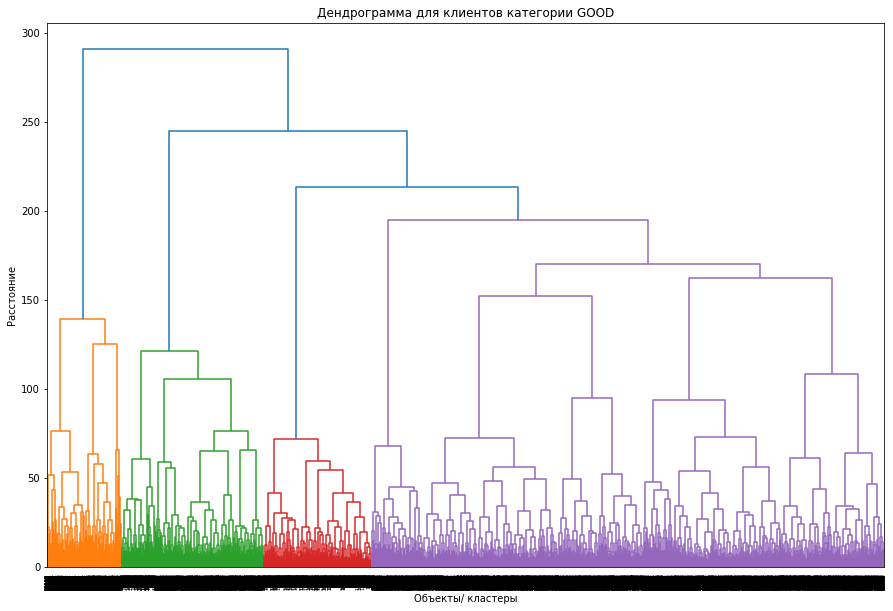

In [429]:
plt.figure(figsize=(15, 10))
Z = linkage(X_st, method='ward') 
plt.title('Дендрограмма для клиентов категории GOOD')
plt.xlabel('Объекты/ кластеры')
plt.ylabel('Расстояние')
dendrogram(Z, orientation='top')
plt.show();

Предварительный вывод: Видим 4 класса.

▶  Усеченная дендрограмма: визуализация заданного числа кластеров

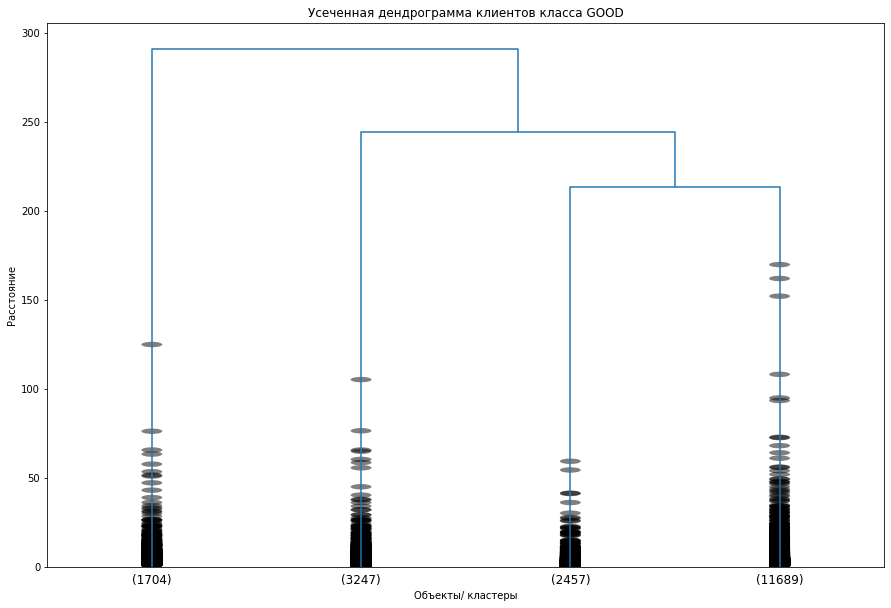

In [431]:
plt.figure(figsize=(15, 10))
dendrogram(Z, 
           truncate_mode = 'lastp',
           p=4,                    
           show_contracted = True)
plt.title('Усеченная дендрограмма клиентов класса GOOD')
plt.xlabel('Объекты/ кластеры')
plt.ylabel('Расстояние')
plt.show();

In [432]:
agl_cluster_label = fcluster(Z, 4, criterion='maxclust')
agl_cluster_label

array([4, 4, 4, ..., 1, 1, 1], dtype=int32)

▶ Метод "локтя". Воспользуемся данным методом для определения оптимального числа кластеров

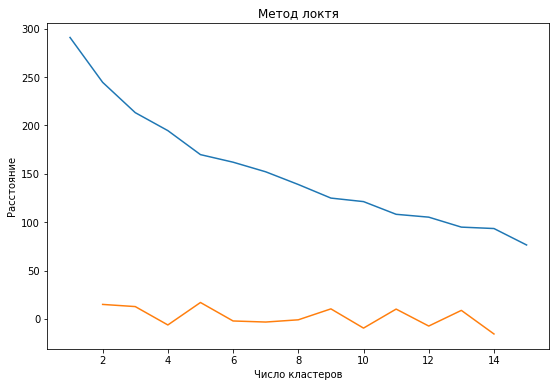

Оптимальное число кластеров: 5


In [433]:
plt.figure(figsize=(9, 6))
last = Z[-15:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1,1)
plt.xlabel('Число кластеров')
plt.ylabel('Расстояние')
plt.title('Метод локтя')
plt.plot(idxs, last_rev)
acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2
print("Оптимальное число кластеров:", k)

Предварительный вывод по иерархической кластеризации: Проведена иерархическая кластеризация, результаты которой представлены в виде дендрограммы. Выделяется 4 кластера, однако при методе "локтя" разбиение происходит на 5. Запомнили метки кластеров для объектов (клиентов).

▶  Неиерархическая кластеризация методом k-means. Прогнозирование меток кластеров для объектов(клиентов).

Число кластеров k=5.

In [434]:
km = KMeans(n_clusters = 5, random_state = 42)
notagl_cluster_label = km.fit_predict(X_st)

In [435]:
type(agl_cluster_label)

numpy.ndarray

 Записываем метки кластеров для клиентов и сравним результаты кластеризации хотя бы по численности кластеров

In [436]:
df_to_cluster_1 = pd.DataFrame(df_to_cluster_1)
df_to_cluster_1['agl_cluster_label'] = agl_cluster_label
df_to_cluster_1['notagl_cluster_label'] = notagl_cluster_label

In [437]:
df_to_cluster_1.groupby('agl_cluster_label')['agl_cluster_label'].count()

agl_cluster_label
1     1704
2     3247
3     2457
4    11689
Name: agl_cluster_label, dtype: int64

In [438]:
df_to_cluster_1.groupby('notagl_cluster_label')['notagl_cluster_label'].count()

notagl_cluster_label
0    1190
1    7940
2    4818
3    1977
4    3172
Name: notagl_cluster_label, dtype: int64

In [439]:
rating_cluster = df_to_cluster_1.groupby('agl_cluster_label').mean().reset_index().sort_values(by = 'client_bez_pr_new', ascending = False)
rating_cluster.T

,0,1,2,3
agl_cluster_label,1.00,2.00,3.00,4.00
mdm_id,7901287.81,9557033.60,11393490.86,9979736.36
kolvo_per,55.70,11.30,3.25,13.16
kolvo_per_do1sms,27.55,4.48,0.78,5.20
kolvo_per_posle1sms,28.15,6.82,2.47,7.96
kolvo_per_dokred,40.95,6.49,0.93,7.13
kolvo_per_poslekred,14.75,4.82,2.32,6.04
tip_perev,5.22,15.79,68.27,4.73
geografy_perev,64.49,66.82,64.64,60.53
sum_perev,746698.03,550431.13,133651.48,222086.13


In [440]:
rating_cluster_k_means = df_to_cluster_1.groupby('notagl_cluster_label').mean().reset_index().sort_values(by = 'client_bez_pr_new', ascending = False)
rating_cluster_k_means.T

,0,1,2,3,4
notagl_cluster_label,0.00,1.00,2.00,3.00,4.00
mdm_id,9923225.02,10320328.33,10642560.41,6814073.81,9660499.09
kolvo_per,12.63,8.95,12.79,56.10,10.99
kolvo_per_do1sms,5.62,3.46,4.03,28.83,4.30
kolvo_per_posle1sms,7.01,5.49,8.76,27.27,6.69
kolvo_per_dokred,7.13,4.83,5.44,42.58,6.06
kolvo_per_poslekred,5.50,4.12,7.34,13.53,4.93
tip_perev,8.93,24.24,4.31,4.76,15.71
geografy_perev,61.11,64.09,56.74,64.76,66.25
sum_perev,255037.98,170392.12,207200.20,662657.33,636569.05


▶  Кластеризация клиентов без просрочки класса MIDDLE

In [441]:
df_to_cluster_2 = df1[df1.client_bez_pr_new == 2]
X = df_to_cluster_2.drop(['client_bez_pr_new'], axis = 1)
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

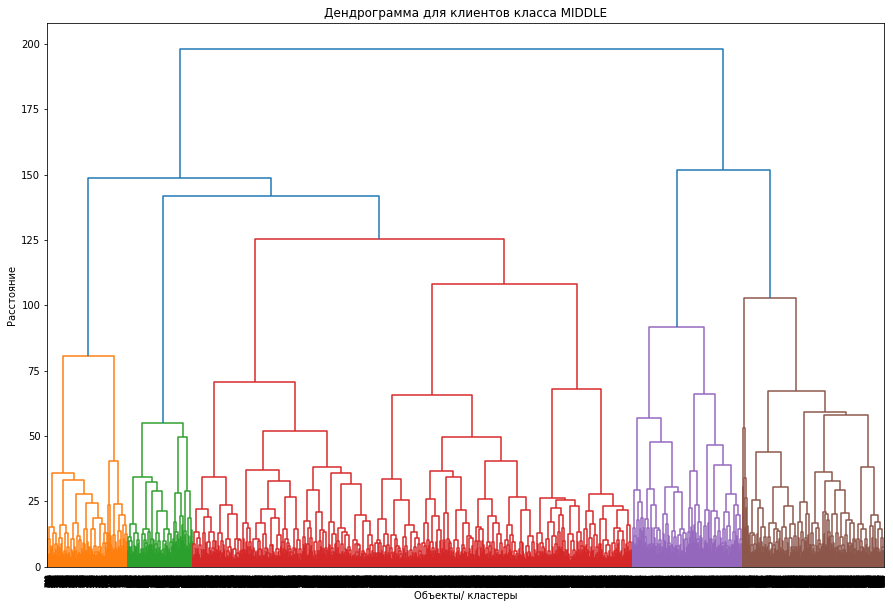

In [442]:
plt.figure(figsize=(15, 10))
Z = linkage(X_st, method='ward') 
plt.title('Дендрограмма для клиентов класса MIDDLE')
plt.xlabel('Объекты/ кластеры')
plt.ylabel('Расстояние')
dendrogram(Z, orientation='top')
plt.show();

Предварительный вывод: видим 5 классов

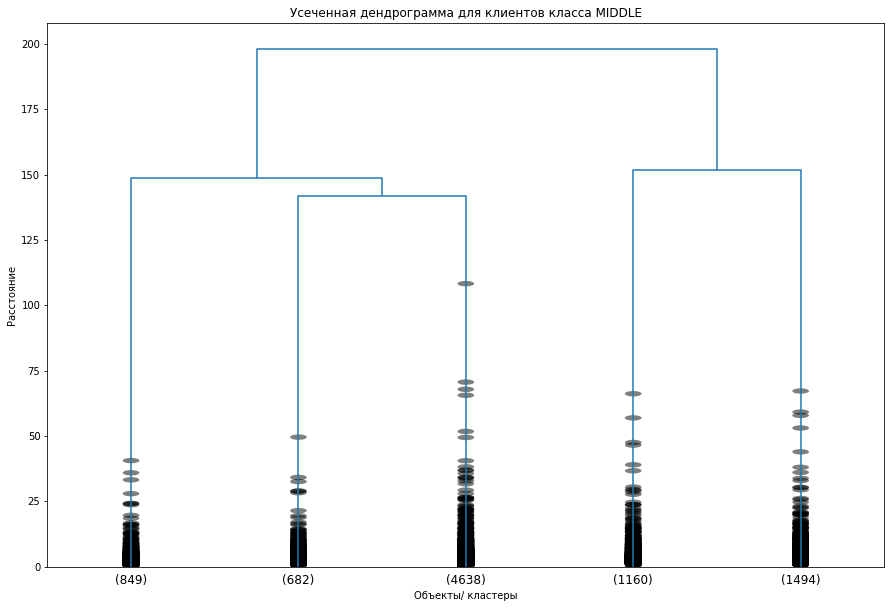

In [443]:
plt.figure(figsize=(15, 10))
dendrogram(Z, 
           truncate_mode = 'lastp',
           p=5,                    
           show_contracted = True)
plt.title('Усеченная дендрограмма для клиентов класса MIDDLE')
plt.xlabel('Объекты/ кластеры')
plt.ylabel('Расстояние')
plt.show();

In [444]:
agl_cluster_label_2 = fcluster(Z, 5, criterion='maxclust')
agl_cluster_label_2

array([3, 3, 1, ..., 4, 4, 4], dtype=int32)

▶ Метод "локтя". Воспользуемся данным методом для определения оптимального числа кластеров

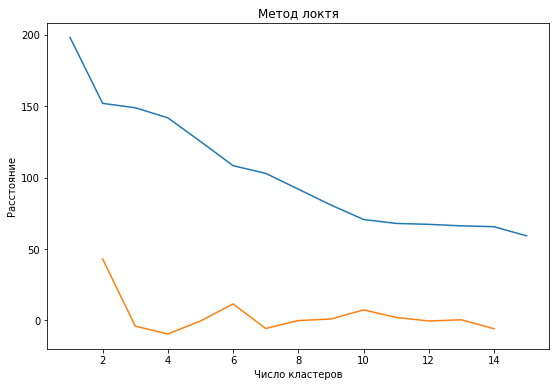

Оптимальное число кластеров: 2


In [445]:
plt.figure(figsize=(9, 6))
last = Z[-15:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1,1)
plt.xlabel('Число кластеров')
plt.ylabel('Расстояние')
plt.title('Метод локтя')
plt.plot(idxs, last_rev)
acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2
print("Оптимальное число кластеров:", k)

Предварительный вывод: Согласно "методу локтя" оптимальное число кластеров 2.

▶  Неиерархическая кластеризация методом k-means. Прогнозирование меток кластеров для объектов(клиентов).

Число кластеров k=2

In [446]:
km = KMeans(n_clusters = 2, random_state = 42)
notagl_cluster_label_2 = km.fit_predict(X_st)

In [447]:
df_to_cluster_2 = pd.DataFrame(df_to_cluster_2)
df_to_cluster_2['agl_cluster_label_2'] = agl_cluster_label_2
df_to_cluster_2['notagl_cluster_label_2'] = notagl_cluster_label_2

In [448]:
rating_cluster_agl = df_to_cluster_2.groupby('agl_cluster_label_2').mean().reset_index().sort_values(by = 'client_bez_pr_new', ascending = False)
rating_cluster_agl.T

,0,1,2,3,4
agl_cluster_label_2,1.00,2.00,3.00,4.00,5.00
mdm_id,11401284.09,10248733.80,10051120.20,6816761.05,9442392.31
kolvo_per,3.41,15.34,11.59,49.60,16.35
kolvo_per_do1sms,0.87,7.01,3.78,23.76,6.00
kolvo_per_posle1sms,2.54,8.33,7.82,25.84,10.35
kolvo_per_dokred,1.05,8.85,5.30,35.08,9.10
kolvo_per_poslekred,2.36,6.49,6.29,14.52,7.25
tip_perev,64.94,9.47,3.97,4.84,4.58
geografy_perev,65.79,59.90,59.99,62.78,62.79
sum_perev,212630.31,289320.63,172458.07,499197.87,656852.37


In [449]:
rating_cluster_k_means = df_to_cluster_2.groupby('notagl_cluster_label_2').mean().reset_index().sort_values(by = 'client_bez_pr_new', ascending = False)
rating_cluster_k_means.T

,0,1
notagl_cluster_label_2,0.00,1.00
mdm_id,10269108.86,6800470.28
kolvo_per,10.57,47.07
kolvo_per_do1sms,3.50,22.26
kolvo_per_posle1sms,7.07,24.82
kolvo_per_dokred,4.78,33.29
kolvo_per_poslekred,5.79,13.78
tip_perev,11.63,4.96
geografy_perev,60.79,64.22
sum_perev,223704.64,723613.92


▶  Кластеризация клиентов класса BAD

In [450]:
df_to_cluster_3 = df1[df1.client_bez_pr_new == 0]
X = df_to_cluster_3.drop(['client_bez_pr_new'], axis = 1)
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

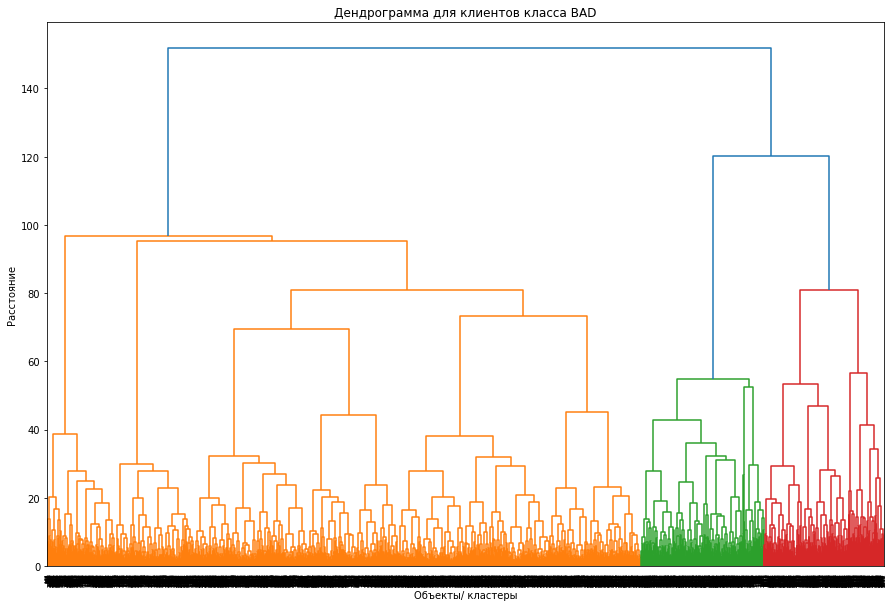

In [451]:
plt.figure(figsize=(15, 10))
Z = linkage(X_st, method='ward') 
plt.title('Дендрограмма для клиентов класса BAD')
plt.xlabel('Объекты/ кластеры')
plt.ylabel('Расстояние')
dendrogram(Z, orientation='top')
plt.show();

▶ Усеченная дендрограмма класса BAD

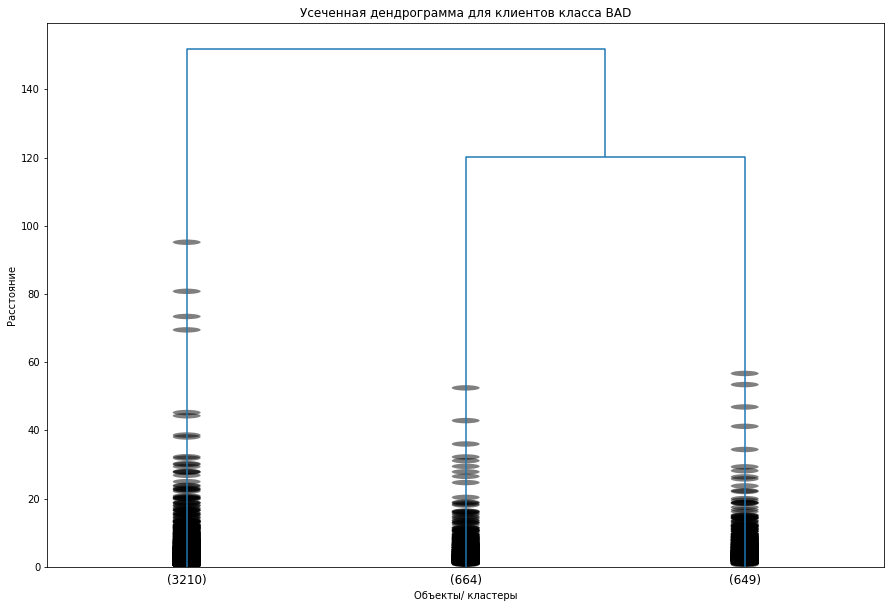

In [452]:
plt.figure(figsize=(15, 10))
dendrogram(Z, 
           truncate_mode = 'lastp',
           p=3,                    
           show_contracted = True)
plt.title('Усеченная дендрограмма для клиентов класса BAD')
plt.xlabel('Объекты/ кластеры')
plt.ylabel('Расстояние')
plt.show();

In [453]:
agl_cluster_label_3 = fcluster(Z, 3, criterion='maxclust')
agl_cluster_label_3

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

▶ Метод "локтя". Воспользуемся данным методом для определения оптимального числа кластеров

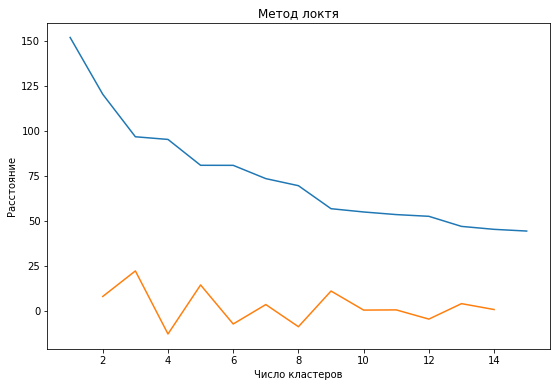

Оптимальное число кластеров: 3


In [454]:
plt.figure(figsize=(9, 6))
last = Z[-15:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1,1)
plt.xlabel('Число кластеров')
plt.ylabel('Расстояние')
plt.title('Метод локтя')
plt.plot(idxs, last_rev)
acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2
print("Оптимальное число кластеров:", k)

Предварительный вывод: Согласно "методу локтя" оптимальное число кластеров 3.

▶ Неиерархическая кластеризация методом k-means. Прогнозирование меток кластеров для объектов(клиентов).

Установим число кластеров k=3

In [455]:
km = KMeans(n_clusters = 3, random_state = 42)
notagl_cluster_label_3 = km.fit_predict(X_st)

In [456]:
df_to_cluster_3 = pd.DataFrame(df_to_cluster_3)
df_to_cluster_3['agl_cluster_label_3'] = agl_cluster_label_3
df_to_cluster_3['notagl_cluster_label_3'] = notagl_cluster_label_3

In [457]:
rating_cluster_agl = df_to_cluster_3.groupby('agl_cluster_label_3').mean().reset_index().sort_values(by = 'client_bez_pr_new', ascending = False)
rating_cluster_agl.T

,0,1,2
agl_cluster_label_3,1.00,2.00,3.00
mdm_id,10711677.85,9933126.72,7326114.12
kolvo_per,6.63,11.21,36.76
kolvo_per_do1sms,2.51,4.08,18.77
kolvo_per_posle1sms,4.13,7.13,17.99
kolvo_per_dokred,3.35,6.13,27.25
kolvo_per_poslekred,3.28,5.08,9.51
tip_perev,13.03,9.95,5.01
geografy_perev,60.96,59.95,59.16
sum_perev,153384.82,591391.75,415773.78


In [458]:
rating_cluster_k_means = df_to_cluster_3.groupby('notagl_cluster_label_3').mean().reset_index().sort_values(by = 'client_bez_pr_new', ascending = False)
rating_cluster_k_means.T

,0,1,2
notagl_cluster_label_3,0.00,1.00,2.00
mdm_id,6666110.98,10669708.64,9732734.63
kolvo_per,47.34,7.36,10.10
kolvo_per_do1sms,25.27,2.76,3.82
kolvo_per_posle1sms,22.07,4.60,6.28
kolvo_per_dokred,36.51,3.79,5.54
kolvo_per_poslekred,10.83,3.56,4.56
tip_perev,5.13,12.37,11.02
geografy_perev,58.41,60.73,60.94
sum_perev,544735.02,137106.90,544214.65


**Промежуточный вывод по кластеризации:** Имеем следующие отличительные характеристики результатов кластеризации по группам GOOD, BAD и MIDDLE клиентов:
  
| Признак | Кластеры для группы GOOD | Кластеры для группы BAD | Кластеры для группы MIDDLE |Комментарий |
|---:|---:|---:|---:|---:|
|`kolvo_per`|Центроиды принимают значения из $[4,01; 12,59]$|Центроиды принимают значения из $[3,9; 13,42]$| Центроиды принимают значения из $[4,51; 14,76]$|клиенты группы MIDDLE совершают больше переводов|
|`kolvo_per_do1sms`|Центроиды принимают значения из $[1.27; 3.19]$|Центроиды принимают значения из $[1.27; 4.77]$| Центроиды принимают значения из $[1.33; 3.90]$| количество переводов до 1 смс в группе MIDDLE меньше чем 2х других|
|`kolvo_per_posle1sms`|Центроиды принимают значения из $[2.71; 9.41]$|Центроиды принимают значения из $[2.6;	8.8]$| Центроиды принимают значения из $[3.1; 10.86]$|количество переводов после 1 смс в группе BAD меньше, чем 2х других|
|`kolvo_per_dokred`|Центроиды принимают значения из $[1.53; 4.47]$|Центроиды принимают значения из $[1.56; 7]$| Центроиды принимают значения из $[1.6; 5.9]$|количество переводов до взятия кредита в группе BAD больше, чем 2х других|
|`kolvo_per_poslekred`|Центроиды принимают значения из $[2.38; 8.12]$|Центроиды принимают значения из $[2.34; 6.42]$| Центроиды принимают значения из $[2.68; 8.86]$|количество переводов после взятия кредита в группе BAD меньше чем 2х других|
|`tip_perev`|Центроиды принимают значения из $[4.41; 36.37]$|Центроиды принимают значения из $[3.7; 26.1]$| Центроиды принимают значения из $[4; 25.18]$|тип переводов в группе GOOD больше чем 2х других|
|`sum_perev`|Центроиды принимают значения из $[103 354; 392 969]$|Центроиды принимают значения из $[102 856; 347 283]$| Центроиды принимают значения из $[104 486; 384 379]$|диапозон типа перевода в группе GOOD немного больше, чем в двух других, BAD - наименьшее значение|
|`max_sum`|Центроиды принимают значения из $[85 544; 286 701]$|Центроиды принимают значения из $[85 446; 281 732]$| Центроиды принимают значения из $[85 955; 286 912]$| максимальная сумма переводов в группах примерно одинакова|
|`sred_sum`|Центроиды принимают значения из $[74 061; 150 344]$|Центроиды принимают значения из $[15 946; 85 732]$| Центроиды принимают значения из $[12 906; 68 778]$| значения в группе GOOD существенно выше в 2 раза, чем в остальных группах|
|`sum_perev_dokred`|Центроиды принимают значения из $[83 907; 278 189]$|Центроиды принимают значения из $[86 682; 274 924]$| Центроиды принимают значения из $[85 027; 280 493]$|средняя сумма переводов до кредитования за пол года по группам примерно одиноковая|
|`sum_perev_dokredgod`|Центроиды принимают значения из $[85 753; 283 340]$|Центроиды принимают значения из $[89 084; 281 841]$| Центроиды принимают значения из $[87 208; 286 008]$|полная сумма перевода до кредитования за год примерно одинаковая во всех группах|
|`kolvo_sms_dootklika`|Центроиды принимают значения из $[10; 18]$|Центроиды принимают значения из $[8; 12]$| Центроиды принимают значения из $[10; 18]$|диапазон количества смс до отклика в группе BAD меньше чем 2х других|
|`dnei_s_sms`|Центроиды принимают значения из $[303; 414]$|Центроиды принимают значения из $[266; 336]$| Центроиды принимают значения из $[285; 400]$|принимают значения примерно в одном диапазоне|
|`vozrast`|Центроиды принимают значения из $[43; 45]$|Центроиды принимают значения из $[37; 41]$| Центроиды принимают значения из $[40; 42]$|возраст в группе BAD меньше|
|`pol_new`|Центроиды принимают значения из $[0.47; 0.55]$|Центроиды принимают значения из $[0.5; 0.63]$| Центроиды принимают значения из $[0.48; 0.57]$|примерно одинаково во всех группах|
|`client_bez_pr_new`|Центроиды принимают значения из $[2; 2]$|Центроиды принимают значения из $[0.00; 0.00]$| Центроиды принимают значения из $[1.00; 1.00]$|значения принимают в соответствии с кодировкой|
|`client_s_pr_a`|Центроиды принимают значения из $[0.3; 0.8]$|Центроиды принимают значения из $[0.2; 0.23]$| Центроиды принимают значения из $[0.2; 0.23]$|Клиенты из группы GOOD и MIDDLE в офис обращаются чаще|
|`client_s_pr_b`|Центроиды принимают значения из $[0.3; 0.8]$|Центроиды принимают значения из $[0.2; 0.27]$| Центроиды принимают значения из $[0.3; 0.7]$|Клиенты из группы GOOD и MIDDLE в офис обращаются чаще|
|`client_s_pr_c`|Центроиды принимают значения из $[0.3; 0.8]$|Центроиды принимают значения из $[0.3; 0.36]$| Центроиды принимают значения из $[0.3; 0.7]$|Клиенты из группы GOOD и MIDDLE в офис обращаются чаще|
|`canal_privl_ofis`|Центроиды принимают значения из $[0.3; 0.8]$|Центроиды принимают значения из $[0.3; 0.5]$| Центроиды принимают значения из $[0.3; 0.7]$|Клиенты из группы GOOD и MIDDLE в офис обращаются чаще|
|`canal_privl_partner`|Центроиды принимают значения из $[0.3; 0.7]$|Центроиды принимают значения из $[0.4; 0.8]$| Центроиды принимают значения из $[0.3; 0.9]$|примерно одинаково во всех группах|
|`canal_privl_stoika`|Центроиды принимают значения из $[0.06; 0.07]$|Центроиды принимают значения из $[0.03; 0.19]$| Центроиды принимают значения из $[0.07; 0.09]$|Клиентов из группы BAD на стойке больше всего.|


**Вывод**
На данном этапе проекта выявлялись признаки, значения которых были бы наиболее характерны для клиентов групп GOOD, MIDDLE и BAD. Для поиска данных признаков кластеризация проведена двумя методами для каждой из групп. Произведена оценка показателей центроидов.

В результате установлено, что значения признаков vozrast, sred_sum, sum_perev, kolvo_per_dokred, kolvo_per_poslekred, kanal_privl_ofis определяют отношение клиента к той или иной группе.


# Шаг 5. Классификация: логистическая регрессия

In [430]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32443 entries, 1715 to 49616
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mdm_id               32443 non-null  int64  
 1   kolvo_per            32443 non-null  float64
 2   kolvo_per_do1sms     32443 non-null  float64
 3   kolvo_per_posle1sms  32443 non-null  float64
 4   kolvo_per_dokred     32443 non-null  float64
 5   kolvo_per_poslekred  32443 non-null  float64
 6   tip_perev            32443 non-null  float64
 7   geografy_perev       32443 non-null  float64
 8   sum_perev            32443 non-null  float64
 9   max_sum              32443 non-null  float64
 10  sred_sum             32443 non-null  float64
 11  sum_perev_dokred     32443 non-null  float64
 12  sum_perev_dokredgod  32443 non-null  float64
 13  kolvo_sms_dootklika  32443 non-null  float64
 14  dnei_s_sms           32443 non-null  float64
 15  vozrast              32443 non-nu

In [459]:
df1.groupby('client_bez_pr_new')['client_bez_pr_new'].agg('count')/df1.shape[0]*100

client_bez_pr_new
0   13.94
1   58.86
2   27.20
Name: client_bez_pr_new, dtype: float64

Промежуточный вывод: Видим, что записей, принадлежащих классу 1 больше, чем записей класса 2 и класса 0, но не в 10!! раз. Значит выборка является сбалансированной.

▶  Формирование обучающих и тестирующих множеств. Масштабирование признаков



Выделяем набор объясняющих переменных и целевой признак;
Разбиваем на обучающую и тестирующие выборки в соотношении 70/30;
Масштабируем признаки.

In [460]:
X = df1.drop(['client_bez_pr_new'], axis = 1)
y = df1['client_bez_pr_new']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

▶  Логистическая регрессия

Задаем параметры для поиска на сетке;
Обучаем и перебираем на сетке;
Выводим лучшие параметры модели.

In [461]:
grid_searcher = GridSearchCV(
    LogisticRegression(max_iter=3000, random_state=42, solver = 'liblinear'), 
    param_grid={
        'C': [0.01, 0.1, 0.5, 1, 10, 50],
        'penalty' : ['l1', 'l2']
    },
    scoring='accuracy',
    cv=5
)

In [462]:
grid_searcher.fit(X_train_st, y_train);

In [463]:
grid_searcher.best_params_

{'C': 0.5, 'penalty': 'l1'}

▶  Обучаем модель с оптимальными параметрами, оцениваем метрики accuracy, precision и recall.

In [464]:
lr = LogisticRegression(random_state=42, max_iter=3000, solver = 'liblinear', C=0.5, penalty = 'l1')
lr.fit(X_train_st, y_train)
y_pred = lr.predict(X_test_st)
lr_metrix = pd.Series([accuracy_score(y_test, y_pred)],
                      ['Accuracy'])
lr_imp_var = pd.DataFrame({'feature':X_train.columns, 'coeff':lr.coef_.tolist()[0]}, )
lr_imp_var['coeff'] = lr_imp_var['coeff'].apply(abs)
lr_imp_var.sort_values(by = 'coeff', ascending = False, inplace = True)

Метрики качества классификационной модели

In [465]:
lr_metrix

Accuracy   0.59
dtype: float64

Промежуточный вывод по качеству модели: в данном случае получилось оценить только 1 метрику, со средним результатом классификации.

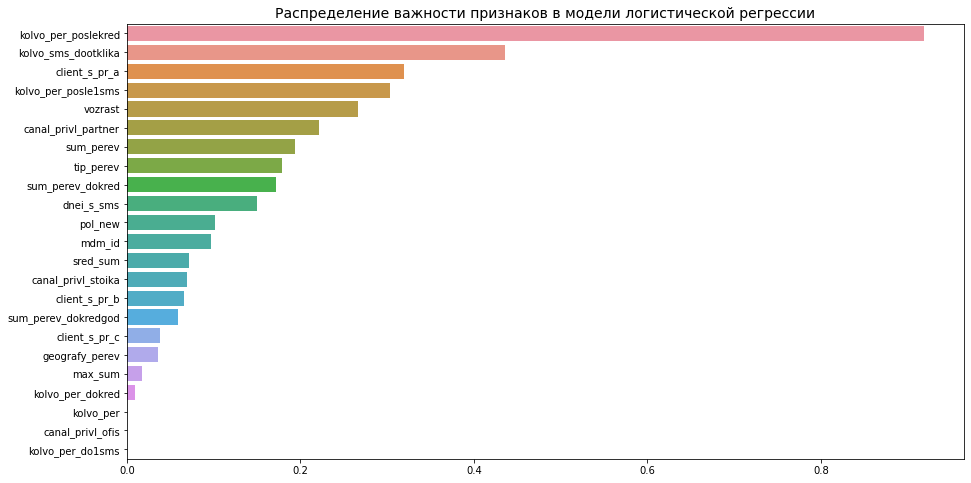

In [466]:
y_label = lr_imp_var['feature'].to_list()
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(x='coeff', y='feature', data = lr_imp_var)
ax.get_yticklabels(y_label)
ax.set_title('Распределение важности признаков в модели логистической регрессии',fontsize = 14)
plt.xlabel('',fontsize = 12)
plt.ylabel('', fontsize = 12);

**Промежуточный вывод по важности коэффициентов при признаках в логрегрессии:** 

  Выделим четыре признака:
 - kolvo_per_poslekred ('Количество переводов после взятия кредита'),
 - sum_perev_dokredgod ('Сумма переводов за год до взятия кредита'),
 - sum_perev ('Сумма переводов'), 
 - kolvo_per_posle1sms ('Кол-во переводов после 1 смс'),
  выделенные на этапе корреляционного анализа, как признаки, оказывающие наибольшее влияние на целевой признак, находятся в топ-10 по значимости в уравнении логрессии. 
 Отметим, что в топ-10 входят также признаки: 
 - dnei_s_sms ('Кол-во дней с первой смс') 
 - vozrast('Возраст'),    
 - kolvo_sms_dootklika ('Количество смс до отклика'),
 - canal_privl_partner ('Канал, через который пришел клиент партнер'), 
 - client_s_pr_a ('Клиент с редкими просрочками тип а'),
 - kolvo_per_posle1sms ('Кол-во переводов после 1 смс'),
 - tip_perev ('тип переводов').

# Шаг 6. Проверка гипотез



В результате проведенных ваше действий, в результате можно выявить совокупные признаки выделяющиеся в нескольких методах анализа и проверить на их основе несколько гипотез.
Перейдем теперь к проверке соответствующих статистических гипотез в отношении выделенных признаков.

-  выдвигаем гипотезу о том, что имеется статистически значимое различие между средним возрастом и клиентами, относящимися к тому или иному классу GOOD/MIDDLE/BAD ;
- выдвигаем гипотезу о том, что величина количества переводов после взятия кредита статистически значима в зависимости от класса GOOD/MIDDLE/BAD;
- выдвигаем гипотезу о том, что величина количества переводов до взятия кредита статистически значима в зависимости от класса GOOD/MIDDLE/BAD;
-  выдвигаем гипотезу о том, что через канал офис приходят более благонадежные клиенты (если это укдладывается в контекст класса GOOD).

Сформулируем гипотезы:

для признака 'vozrast': нулевая гипотеза  H0 : Разница в возрасте между классами клиентов 'BAD', 'GOOD', 'MIDDLE' статистически незначима;

для признака 'kolvo_per_poslekred': нулевая гипотеза  H0 : Количество переводов после взятия кредита для классов клиентов 'BAD', 'GOOD', 'MIDDLE' статистически незначима;

для признака 'kolvo_per_posle1sms': нулевая гипотеза  H0 : Количество переводов после взятия кредита для классов клиентов 'BAD', 'GOOD', 'MIDDLE' статистически незначима;

для признака 'client_s_pr_a': нулевая гипотеза  H0 : Канал привлечения для классов клиентов 'BAD', 'GOOD', 'MIDDLE' статистически незначима;

Для всех сформулированных гипотез  H0  альтернативная гипотеза  H1  такова:

разница статистически значима.
Для всех гипотез уровень значимости установим  α=0.05 .

In [467]:
dict_to_rus_2 = {'mdm_id': 'идентификационный номер клиента',
               'kolvo_per':'Количество переводов',
               'kolvo_per_do1sms':'Количество переводов до 1 смс', 
               'kolvo_per_posle1sms':'Количество переводов после 1 смс', 
               'kolvo_per_dokred':'Количество переводов до взятия кредита', 
               'kolvo_per_poslekred':'Количество переводов после взятия кредита', 
               'tip_perev':'Тип переводов', 
               'geografy_perev':'География переводов',
               'sum_perev':'Сумма перевода', 
               'max_sum':'Максимальная сумма перевода', 
               'sred_sum':'Средняя сумма перевода', 
               'sum_perev_dokred':'Сумма перевода за полгода до взятия кредита', 
               'sum_perev_dokredgod':'Сумма перевода за год до взятия кредита',
               'kolvo_sms_dootklika':'Количество смс до отклика',
               'dnei_s_sms':'Дней с первой смс', 
               'vozrast':'Возраст',
               'pol_new':'Пол', 
               'client_bez_pr_new':'Дисциплина клиентов без просрочки',
               'client_s_pr_a':'Дисциплина клиентов с редкими просрочками а',
               'client_s_pr_b':'Дисциплина клиентов с редкими просрочками b',
               'client_s_pr_c':'Дисциплина клиентов с редкими просрочками c',
               'canal_privl_ofis':'Канал, через который пришел клиент офис',
               'canal_privl_stoika':'Канал, через который пришел клиент стойка',
               'canal_privl_partner':'Канал, через который пришел клиент партнер'
}

In [468]:
from scipy.stats.distributions import alpha
alpha = 0.05

In [469]:
def test_mannwhitneyu(col, alpha):
    ds1 = df1[df1.client_bez_pr_new == 0][col]
    ds2 = df1[df1.client_bez_pr_new == 1][col]
    results = st.mannwhitneyu(ds1, ds2, alternative = 'two-sided')
    print('Результаты проверки гипотезы H_0 по критерию Уилкоксона-Манна-Уитни:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(results.pvalue))
    if results.pvalue < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница между группами клиентов 'BAD', 'COOD', 'MIDDLE' 
по признаку <<{dict_to_rus_2[col]}>> статистически значима.""")
    else: print(f"""Не получилось отвергнуть нулевую гипотезу: разница между группами клиентов 'BAD', 'COOD', 'MIDDLE' 
по признаку <<{dict_to_rus_2[col]}>> статистически незначима.""")
    print('------------------------------------------------------------')

▶  Проверка гипотез для признаков kolvo_per_dokred и canal_privl_ofis

In [473]:
test_int_var = ['client_s_pr_a', 'kolvo_per_posle1sms']
for col in test_int_var:
    test_mannwhitneyu(col, alpha)

Результаты проверки гипотезы H_0 по критерию Уилкоксона-Манна-Уитни:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница между группами клиентов 'BAD', 'COOD', 'MIDDLE' 
по признаку <<Дисциплина клиентов с редкими просрочками а>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по критерию Уилкоксона-Манна-Уитни:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница между группами клиентов 'BAD', 'COOD', 'MIDDLE' 
по признаку <<Количество переводов после 1 смс>> статистически значима.
------------------------------------------------------------


▶  Проверка гипотез для признаков vozrast и kolvo_per_poslekred

In [474]:
test_int_var = ['kolvo_per_poslekred', 'vozrast']
for col in test_int_var:
    test_mannwhitneyu(col, alpha)

Результаты проверки гипотезы H_0 по критерию Уилкоксона-Манна-Уитни:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница между группами клиентов 'BAD', 'COOD', 'MIDDLE' 
по признаку <<Количество переводов после взятия кредита>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по критерию Уилкоксона-Манна-Уитни:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница между группами клиентов 'BAD', 'COOD', 'MIDDLE' 
по признаку <<Возраст>> статистически значима.
------------------------------------------------------------


# Шаг 7. Итоговые выводы

Результатом выполнения проекта является обнаружение значимых признаков для групп клиентов 'BAD', 'GOOD', 'MIDDLE':
- количество переводов после 1 смс;
- возраст;
- количество переводов после взятия кредита;
- каналы привлечения в разрезе (офис/партнер/стойка);
- количество смс до отклика.

Чтобы разобраться более детально в взаимосвязи групп 'BAD', 'GOOD', 'MIDDLE' и признаков требуется больше информации. 

Для выявления значимых признаков для групп клиентов 'BAD', 'GOOD', 'MIDDLE' реализованы следующие этапы:
1. Проведена предобработка данных. В результате:
    - исправлены заголовки признаков. Заголовки для удобства названы не численными значениями,а латиницей;
    - исследованы типы признаков. Установленные типы данных соответствуют содержательному смыслу признаков; 
    - изучены признаки, исходя из значений описательных статистик;
    - проведен поиск дублирующихся записей. Подобные записи удалены; 
    - проведен анализ аномальных наблюдений. Обнаружены выбросы.Выбросы удалены; 
    - проведен анализ пропущенных значений. Пропуски удалены.

2. Проведен исследовательский анализ данных. В результате применения разнообразных инструментов, начиная от анализа по группам описательных статистик, гистограмм и распределений, заканчивая корреляционным анализом, методами классификации и кластеризации. В результате выявлены указанные выше признаки, влияние которых прослеживается на целевой. 
 
3. Далее в отношении данных признаков сформулированы и проверены соответствующие статистические гипотезы. Проведенная проверка гипотез подтвердила значимость всех признаков.

4. Наиболее типичные группы клиентов, которым можно сделать предложение по кредитованию: средний возраст во всех группах 35-45 лет, половая принадлежность не значима. 

  Клиенты кластера 0 - это люди имеющие возраст 43-44 года, совершают совершенно разное количество переводов (3-28) с высоким средним чеком от 33 до 193 тыс., до взятия кредита совершали такое же количество переводов. Сумма переводов до 853 тыс. Сумма перевода за год до взятия кредита большая от до 1,6 млн. Тип переводов данного кластера обширный. Эти клиенты могут обратиться через любой канал. 

  Клиенты кластера 1 - это люди более младшего возраста в среднем от 35 лет, совершают среднее количество переводов (7-26) с средней суммой от 10 до 37 тыс,  до взятия кредита совершали большее количество переводов. Сумма перевода за пол года до взятия кредита средняя от 77 до 249 тыс. В данном кластере больше клиентов женского пола, есть просрочки и, как следствие, экстремально высокий показатель количества смс до отклика и дней после получения смс. Эти клиенты обращаются через офис и стойку. 

  Клиенты кластера 2 - это люди среднего возраста, совершают совсем мало переводов (2-6), но при этом средняя сумма от 33 до 106 тыс., по количеству переводов до и после кредитования особой разницы не наблюдается. Сумма перевода за пол года до взятия кредита средняя от 90 до 273 тыс.  Эти клиенты обращаются через любой канал. 

  Клиенты кластера 3 - наиболее финансово стабильные люди возраста 42-46 лет, совершают много переводов (49-84 шт.) с низкой средней суммой от 7 до 35 тыс. Сумма перевода за пол года до взятия кредита  от 74 до 211 тыс. Сумма переводов достигает 2,4 млн. После кредитования количество переводов значительно снижается. Эти клиенты обращаются через любой канал.  

  Клиенты кластера 4 - это люди имеющие возраст также выше среднего, совершают много переводов (8-28) с средней суммой от 9 до 35 тыс.,  до взятия кредита совершали немного больше переводов.Быстро реагируют на смс. Сумма перевода за пол года до взятия кредита  от 88 до 164 тыс. Эти клиенты обращаются через стойку от через партнера. 
